# Final Project 

#### Import necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

#### Import CSV Data Files 

In [2]:
df1 = pd.read_csv(r'E:/ML with python/Final Project/ML Case Study.csv',header=0,encoding='utf-8')

In [3]:
df2 = pd.read_csv(r'E:/ML with python/Final Project/Colleges.csv',header=0,encoding='utf-8')

In [4]:
df3 = pd.read_csv(r'E:/ML with python/Final Project/cities.csv',header=0,encoding='utf-8')

In [5]:
df1.head(10)

College             City       Role  \
0                                 SVNIT Surat          Asansol    Manager   
1                                  NIT Bhopal            Ajmer  Executive   
2                                IEM, Kolkata  Rajpur Sonarpur  Executive   
3                           KIIT, Bhubaneswar            Ajmer  Executive   
4                                         DTU         Durgapur  Executive   
5                                  IIIT Delhi         Kolhapur  Executive   
6                      BMS College, Bangalore            Surat  Executive   
7                                      LNMIIT            Delhi  Executive   
8  Dayanand College of Engineering, Bangalore          Chennai  Executive   
9                   NIT Tiruchipally (Trichy)         Kolhapur  Executive   

   Previous_CTC  Previous_job_change  Graduation Marks  EXP_Month       CTC  
0         55523                    3                66         19  71406.58  
1         57081                    1                84         18  68005.87  
2         60347                    2                52         28  76764.02  
3         49010                    2                81         33  82092.39  
4         57879                    4                74         32  73878.10  
5         54340                    4                73         31  59950.89  
6         60298                    1                42         46  66602.34  
7         49944                    2                56         37  57768.44  
8         53124                    4                40         37  70083.30  
9         51141                    1                47         60  85648.48

In [6]:
df2.head()

Tier 1          Tier 2                                      Tier 3
0     IIT Bombay  IIIT Bangalore  Ramaiah Institute of Technology, Bengaluru
1      IIT Delhi      IIIT Delhi                      TIET/Thapar University
2  IIT Kharagpur          IGDTUW                         Manipal Main Campus
3     IIT Madras     NIT Calicut                                 VIT Vellore
4     IIT Kanpur   IIITM Gwalior                             SRM Main Campus

In [7]:
df3.head()

Metrio City non-metro cities
0      Mumbai         Dehradun
1       Delhi         Durgapur
2     Kolkata          Asansol
3     Chennai         Rourkela
4   Bangalore        Kozhikode

##### Code Explanation

* The command df1 = pd.read_csv(r'E:/ML with python/Final Project/ML Case Study.csv',header=0,encoding='utf-8') is used to load the csv data on this jupyter notebook.
* The command df.head() returns the loaded csv data and display the csv data table on jupyter notebook.



#### Changing into categorical variable  to understandable to Machine learning 

In [8]:
Tier1=df2["Tier 1"].tolist()
Tier2=df2["Tier 2"].tolist()
Tier3=df2["Tier 3"].tolist()
for item in df1.College:
    if item in Tier1:
        df1["College"].replace(item, 1 ,inplace=True)
    elif item in Tier2:
        df1["College"].replace(item, 2 ,inplace=True)
    elif item in Tier3:
        df1["College"].replace(item, 3 ,inplace=True)

In [9]:
df1.head()

College             City       Role  Previous_CTC  Previous_job_change  \
0        2          Asansol    Manager         55523                    3   
1        2            Ajmer  Executive         57081                    1   
2        3  Rajpur Sonarpur  Executive         60347                    2   
3        3            Ajmer  Executive         49010                    2   
4        1         Durgapur  Executive         57879                    4   

   Graduation Marks  EXP_Month       CTC  
0                66         19  71406.58  
1                84         18  68005.87  
2                52         28  76764.02  
3                81         33  82092.39  
4                74         32  73878.10

In [10]:
Metro_city=df3["Metrio City"].tolist()
Non_Metro_city=df3["non-metro cities"].tolist()


for item in df1.City:
    if item in Metro_city:
        df1["City"].replace(item, 1 ,inplace=True)
    elif item in Non_Metro_city:
        df1["City"].replace(item,2,inplace=True)

In [11]:
df1 = pd.get_dummies(df1)

In [12]:
df1.head()

College  City  Previous_CTC  Previous_job_change  Graduation Marks  \
0        2     2         55523                    3                66   
1        2     2         57081                    1                84   
2        3     2         60347                    2                52   
3        3     2         49010                    2                81   
4        1     2         57879                    4                74   

   EXP_Month       CTC  Role_Executive  Role_Manager  
0         19  71406.58           False          True  
1         18  68005.87            True         False  
2         28  76764.02            True         False  
3         33  82092.39            True         False  
4         32  73878.10            True         False

In [13]:
df1 = df1.astype({'Role_Executive':int,'Role_Manager':int})

In [14]:
df1.head()

College  City  Previous_CTC  Previous_job_change  Graduation Marks  \
0        2     2         55523                    3                66   
1        2     2         57081                    1                84   
2        3     2         60347                    2                52   
3        3     2         49010                    2                81   
4        1     2         57879                    4                74   

   EXP_Month       CTC  Role_Executive  Role_Manager  
0         19  71406.58               0             1  
1         18  68005.87               1             0  
2         28  76764.02               1             0  
3         33  82092.39               1             0  
4         32  73878.10               1             0

##### Explanation

* Tier1, Tier2, and Tier3 are lists created by extracting the "Tier 1", "Tier 2", and "Tier 3" columns from df2, respectively, using the tolist() method. These lists contain the names of colleges categorized into different tiers.

* The code then iterates over each item in the "College" column of df1 using a for loop.

* For each college (item) in df1, the code checks if it is present in Tier1, Tier2, or Tier3. If the college is found in Tier1, its value in the "College" column of df1 is replaced with the integer 1. Similarly, if it is found in Tier2, its value is replaced with 2, and if found in Tier3, its value is replaced with 3.

* The replace() function is used to replace the value of the college name in the "College" column with the corresponding tier number.

* This function apply same for the metro city and non-metro city.

* df1 = pd.get_dummies(df1) - This command get dummies from the data which has a categorial variable and change it to boolean.

* df1.astype({'Role_Executive':int,'Role_Manager':int}) - This command helps to convert the boolean data inot integer values.

#### Data Preprocessing and Analysis

In [15]:
df1.shape

(1589, 9)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous_CTC         1589 non-null   int64  
 3   Previous_job_change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP_Month            1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Executive       1589 non-null   int32  
 8   Role_Manager         1589 non-null   int32  
dtypes: float64(1), int32(2), int64(6)
memory usage: 99.4 KB


* No missing values are there in this data set


In [17]:
df1.describe()

College         City  Previous_CTC  Previous_job_change  \
count  1589.000000  1589.000000   1589.000000          1589.000000   
mean      1.975456     1.485840  55518.453744             2.528634   
std       0.838330     0.499957   6655.218445             1.123918   
min       1.000000     1.000000  36990.000000             1.000000   
25%       1.000000     1.000000  50518.000000             2.000000   
50%       2.000000     1.000000  55291.000000             3.000000   
75%       3.000000     2.000000  60109.000000             4.000000   
max       3.000000     2.000000  77911.000000             4.000000   

       Graduation Marks    EXP_Month            CTC  Role_Executive  \
count       1589.000000  1589.000000    1589.000000     1589.000000   
mean          59.855255    39.044682   75353.278798        0.793581   
std           14.935139    14.108875   12587.288237        0.404862   
min           35.000000    18.000000   53020.320000        0.000000   
25%           46.000000    26.000000   66902.350000        1.000000   
50%           60.000000    39.000000   73028.670000        1.000000   
75%           73.000000    51.000000   80588.670000        1.000000   
max           85.000000    64.000000  123416.990000        1.000000   

       Role_Manager  
count   1589.000000  
mean       0.206419  
std        0.404862  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [18]:
df1.corr()

College      City  Previous_CTC  Previous_job_change  \
College              1.000000  0.014946      0.041979            -0.055060   
City                 0.014946  1.000000     -0.004644            -0.051670   
Previous_CTC         0.041979 -0.004644      1.000000             0.005756   
Previous_job_change -0.055060 -0.051670      0.005756             1.000000   
Graduation Marks     0.003539  0.018616     -0.032976             0.019267   
EXP_Month            0.011752  0.023613      0.119163             0.023488   
CTC                 -0.029592  0.020365      0.258000             0.011370   
Role_Executive       0.014749 -0.048671     -0.012321             0.017150   
Role_Manager        -0.014749  0.048671      0.012321            -0.017150   

                     Graduation Marks  EXP_Month       CTC  Role_Executive  \
College                      0.003539   0.011752 -0.029592        0.014749   
City                         0.018616   0.023613  0.020365       -0.048671   
Previous_CTC                -0.032976   0.119163  0.258000       -0.012321   
Previous_job_change          0.019267   0.023488  0.011370        0.017150   
Graduation Marks             1.000000  -0.057061 -0.005450       -0.017858   
EXP_Month                   -0.057061   1.000000  0.301115        0.026751   
CTC                         -0.005450   0.301115  1.000000       -0.621311   
Role_Executive              -0.017858   0.026751 -0.621311        1.000000   
Role_Manager                 0.017858  -0.026751  0.621311       -1.000000   

                     Role_Manager  
College                 -0.014749  
City                     0.048671  
Previous_CTC             0.012321  
Previous_job_change     -0.017150  
Graduation Marks         0.017858  
EXP_Month               -0.026751  
CTC                      0.621311  
Role_Executive          -1.000000  
Role_Manager             1.000000

##### Explanation

* df.shape returns the value of rows and columns the table contains .

* df.info returns all the values in terms of count and also show their data type wether they are int , float or object.

* df.describe returns all the statistical calculations for each columns like mean , std , min , 25% , 75% and max.

* df.corr used to calculate pairwise correlation of columns .

### Univariate and Bivariate with Outliers Analysis

#### JointPlot Visualization

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


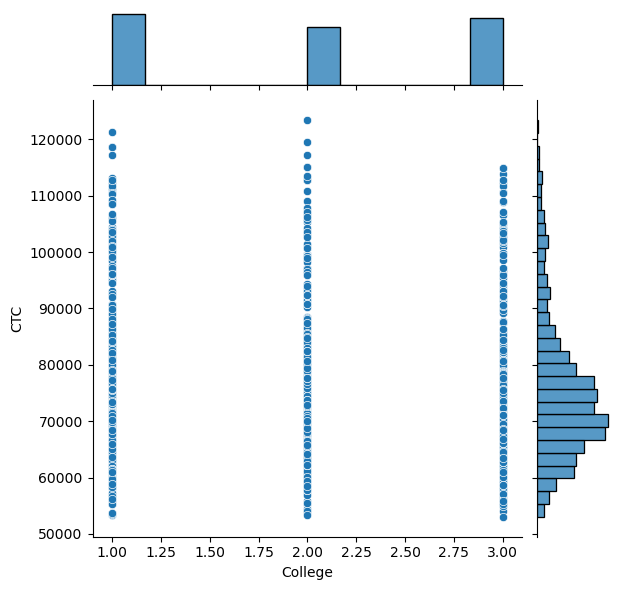

In [19]:
sns.jointplot(x='College',y='CTC',data=df1)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


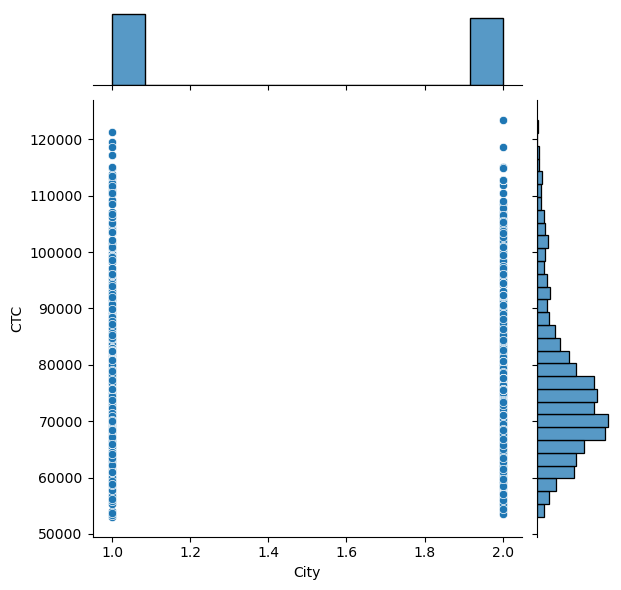

In [20]:
sns.jointplot(x='City',y='CTC',data=df1)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


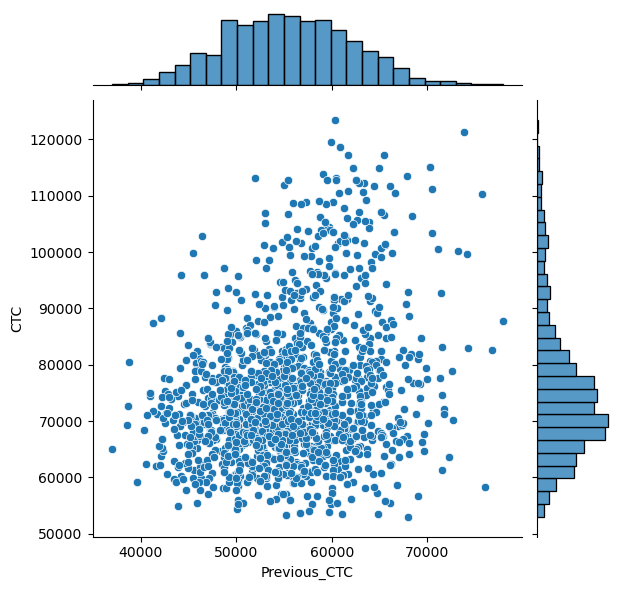

In [21]:
sns.jointplot(x='Previous_CTC',y='CTC',data=df1)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


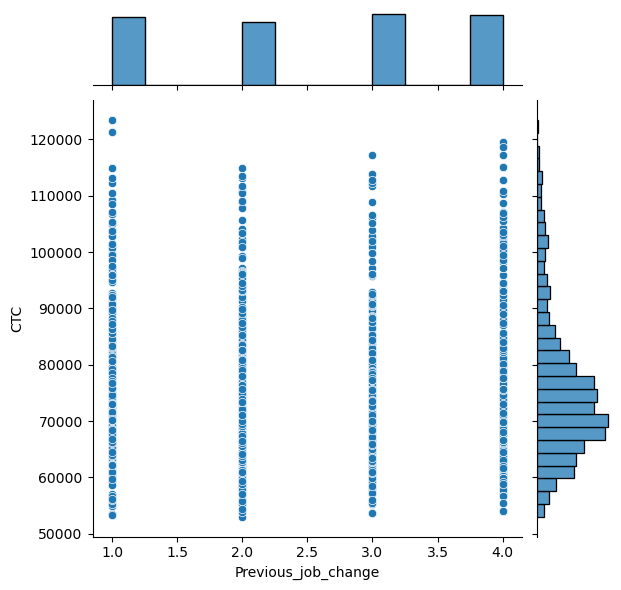

In [22]:
sns.jointplot(x='Previous_job_change',y='CTC',data=df1)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


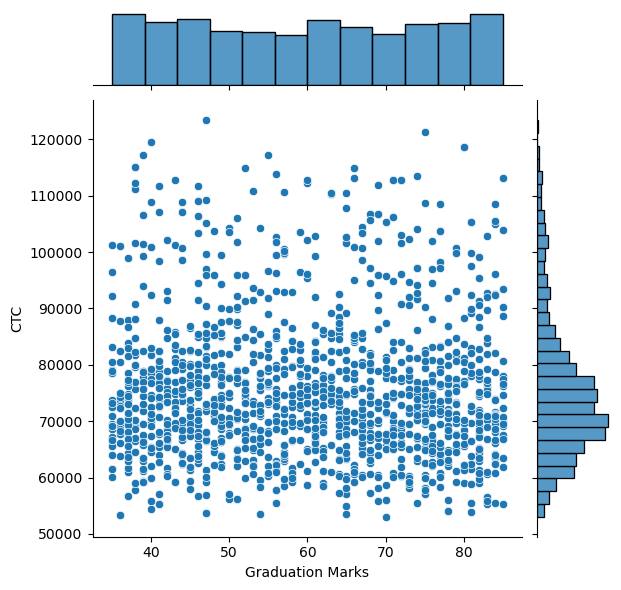

In [23]:
sns.jointplot(x='Graduation Marks',y='CTC',data=df1)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


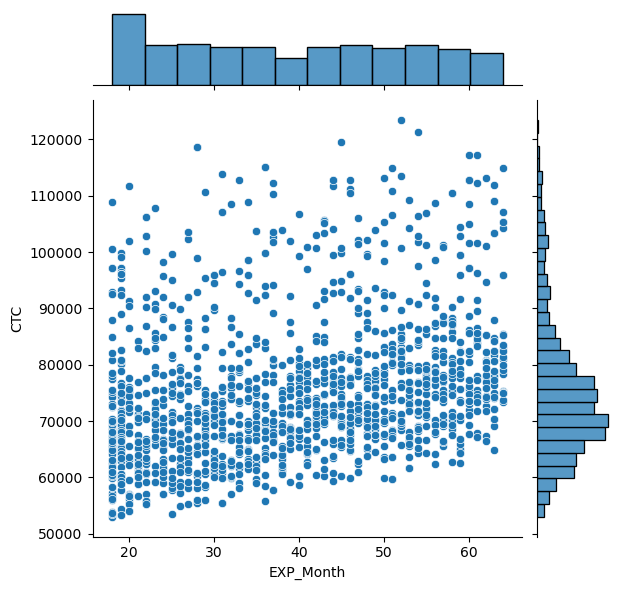

In [24]:
sns.jointplot(x='EXP_Month',y='CTC',data=df1)

* With the scatterplot we found that the the relations which showned above don't contain outliers 

#### Barplot Visualization

<Axes: xlabel='College', ylabel='CTC'>

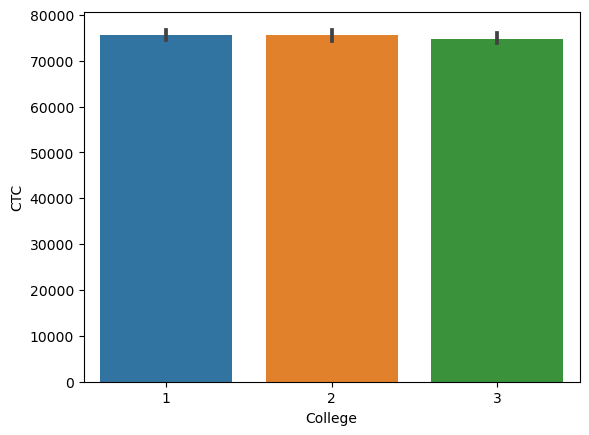

In [25]:
sns.barplot(x='College',y='CTC',data=df1)

<Axes: xlabel='City', ylabel='CTC'>

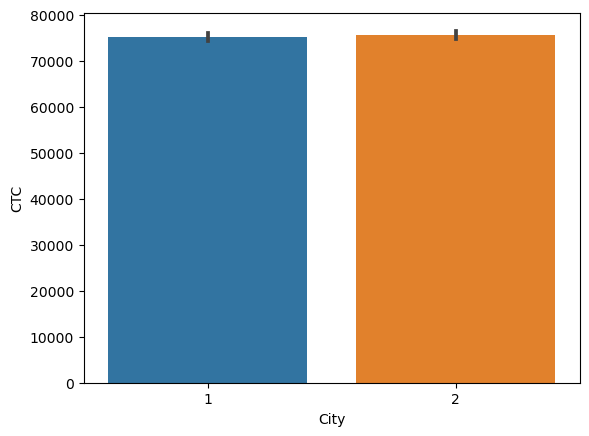

In [26]:
sns.barplot(x='City',y='CTC',data=df1)

<Axes: xlabel='Previous_CTC', ylabel='CTC'>

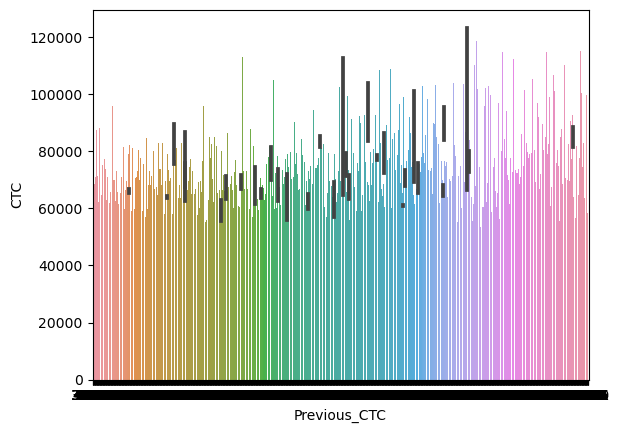

In [27]:
sns.barplot(x='Previous_CTC',y='CTC',data=df1)

<Axes: xlabel='Graduation Marks', ylabel='CTC'>

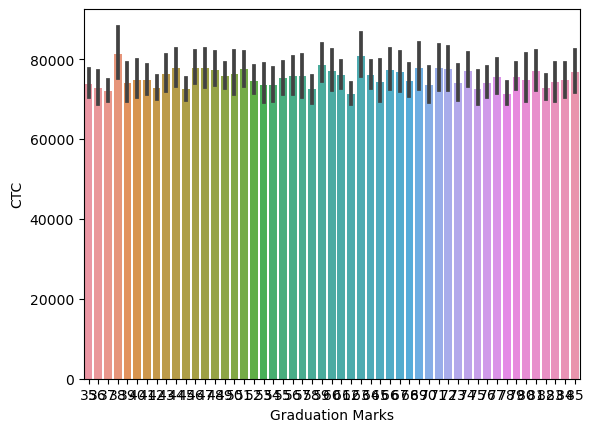

In [28]:
sns.barplot(x='Graduation Marks',y='CTC',data=df1)

<Axes: xlabel='EXP_Month', ylabel='CTC'>

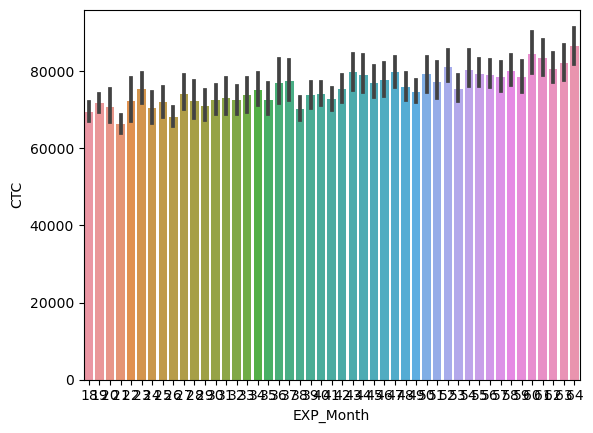

In [29]:
sns.barplot(x='EXP_Month',y='CTC',data=df1)

* So in the bar plot we can see the the graph relations with CTC and pervious CTC varying a lot so CTC will be our dependent variable for the Regression models

#### Boxplot Visualization

<Axes: xlabel='Previous_CTC'>

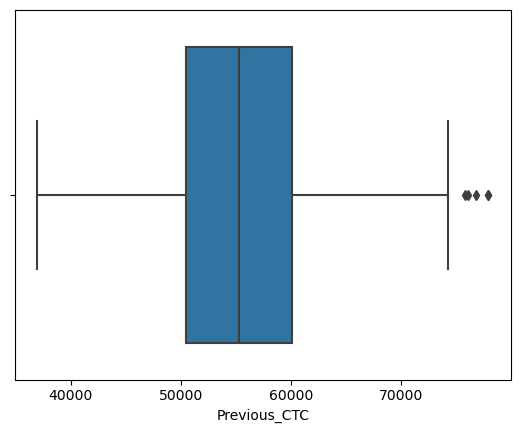

In [30]:
sns.boxplot(x=df1['Previous_CTC'])

<Axes: xlabel='CTC'>

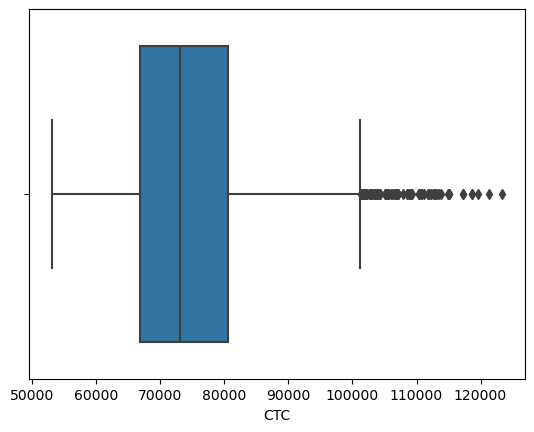

In [31]:
sns.boxplot(x=df1['CTC'])

In [32]:
# percentile 
np.percentile(df1.CTC,[99])

array([112826.26])

* By the boxplot and the percentile we can see CTC doesn't contain any outliers

#### Regression Visualization

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


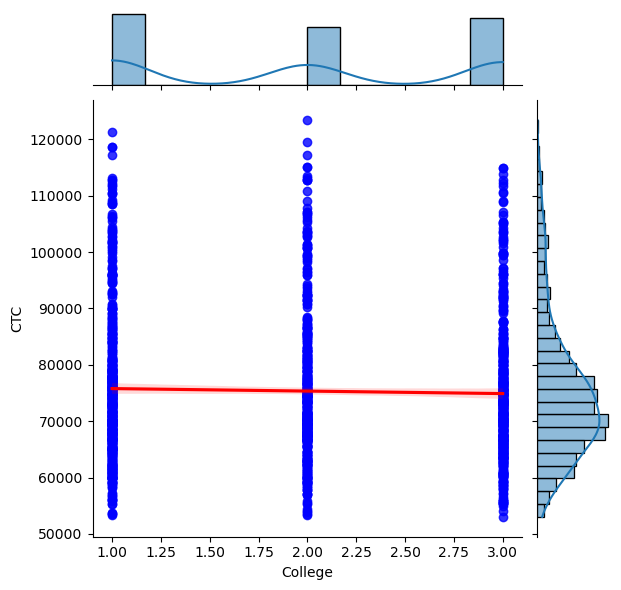

In [33]:
sns.jointplot(x='College',y='CTC',data=df1,kind='reg',line_kws = {"color":"red"},scatter_kws = {"color":"blue"})

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


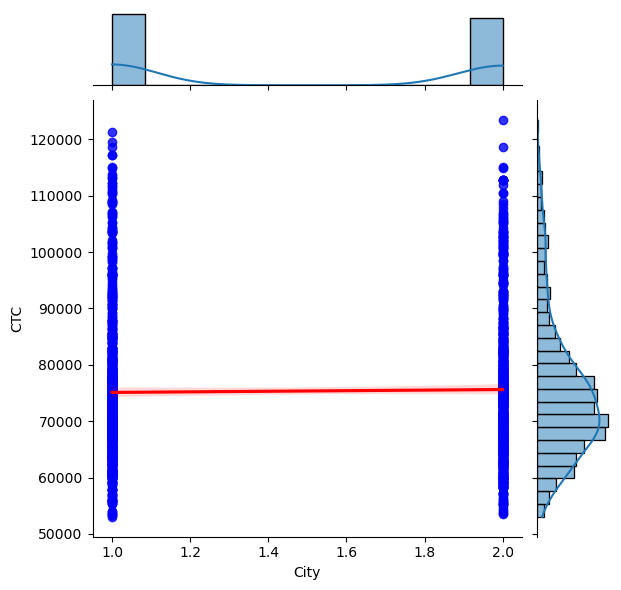

In [34]:
sns.jointplot(x='City',y='CTC',data=df1,kind='reg',line_kws = {"color":"red"},scatter_kws = {"color":"blue"})

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


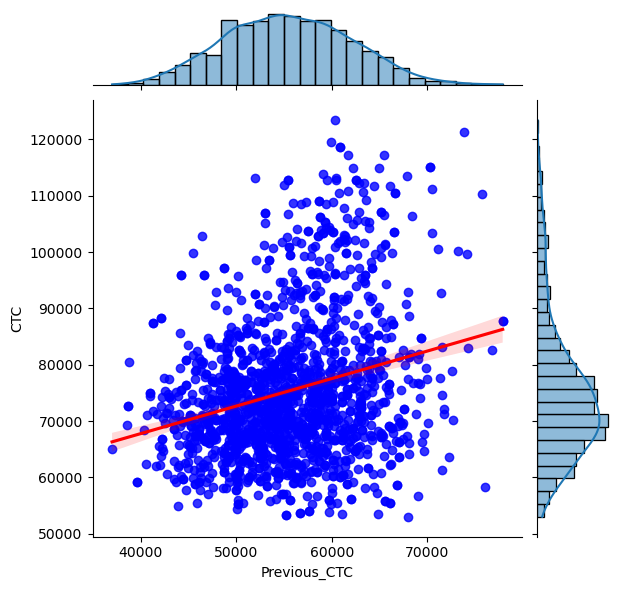

In [35]:
sns.jointplot(x='Previous_CTC',y='CTC',data=df1,kind='reg',line_kws = {"color":"red"},scatter_kws = {"color":"blue"})

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


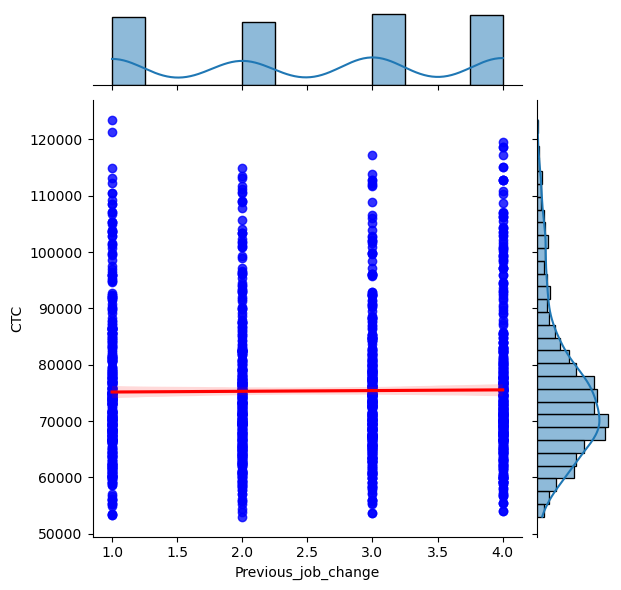

In [36]:
sns.jointplot(x='Previous_job_change',y='CTC',data=df1,kind='reg',line_kws = {"color":"red"},scatter_kws = {"color":"blue"})

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


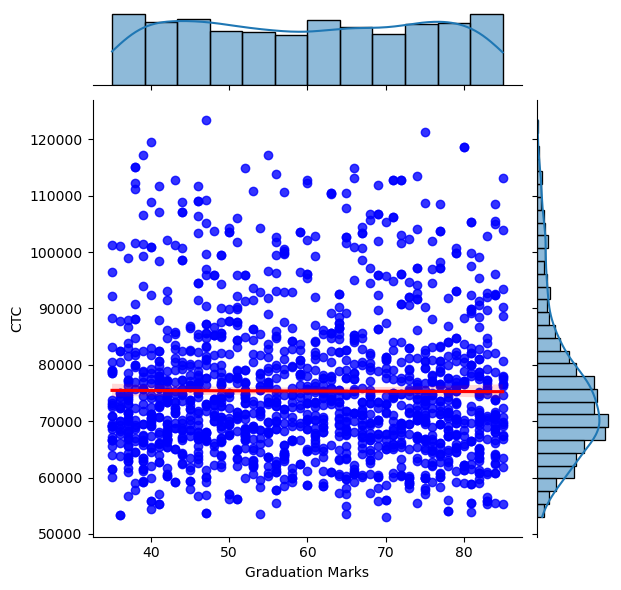

In [37]:
sns.jointplot(x='Graduation Marks',y='CTC',data=df1,kind='reg',line_kws = {"color":"red"},scatter_kws = {"color":"blue"})

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


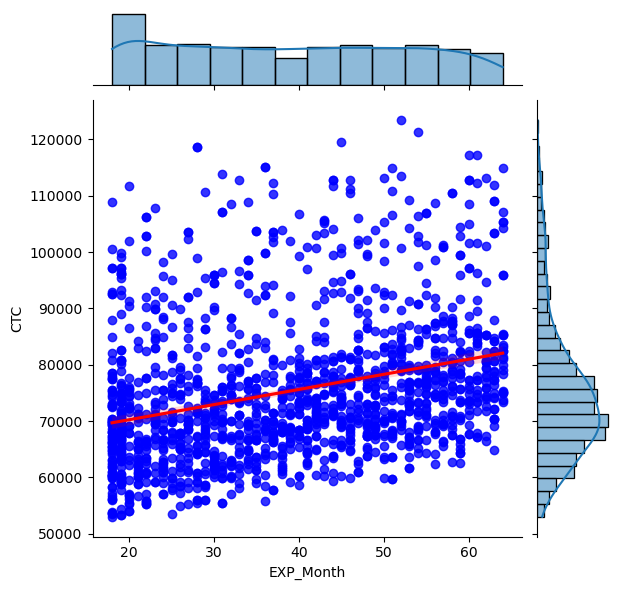

In [38]:
sns.jointplot(x='EXP_Month',y='CTC',data=df1,kind='reg',line_kws = {"color":"red"},scatter_kws = {"color":"blue"})

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


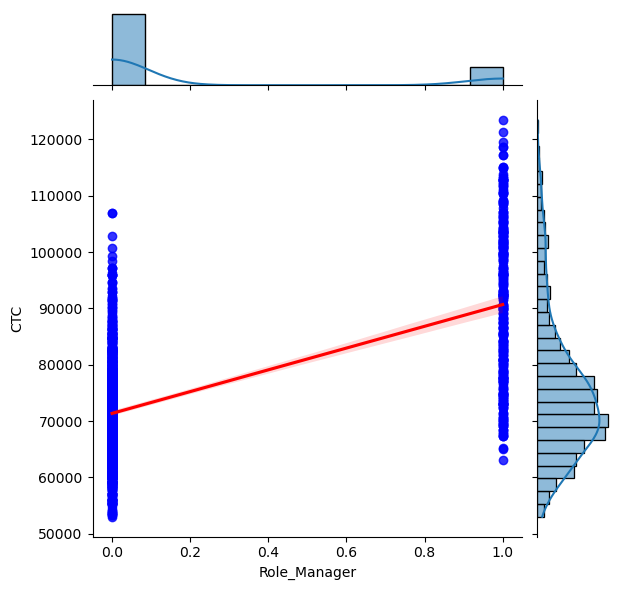

In [39]:
sns.jointplot(x='Role_Manager',y='CTC',data=df1,kind='reg',line_kws = {"color":"red"},scatter_kws = {"color":"blue"})

##### Explanation

* This command sns.jointplot(x='College',y='CTC',data=df1) is used to plot a scatterplot graph between the two variables and displays the marginal distributions of each variable as histograms and it is used to detect if there are outliers or not.

* This command sns.barplot(x='EXP_Month',y='CTC',data=df1) is usde to plot a barplot graph between the two variables .

* This command sns.boxplot(x=df1['CTC']) is used to display a boxplot chart for one variable.

* This command sns.jointplot(x='Role_Manager',y='CTC',data=df1,kind='reg',line_kws = {"color":"red"},scatter_kws = {"color":"blue"}) creates a scatter plot between two variables and displays the marginal distributions of each variable as histograms.In addition to the scatter plot and histograms, Seaborn will fit a linear regression model to the data and display the regression line with confidence intervals.

#### Multivariate 

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

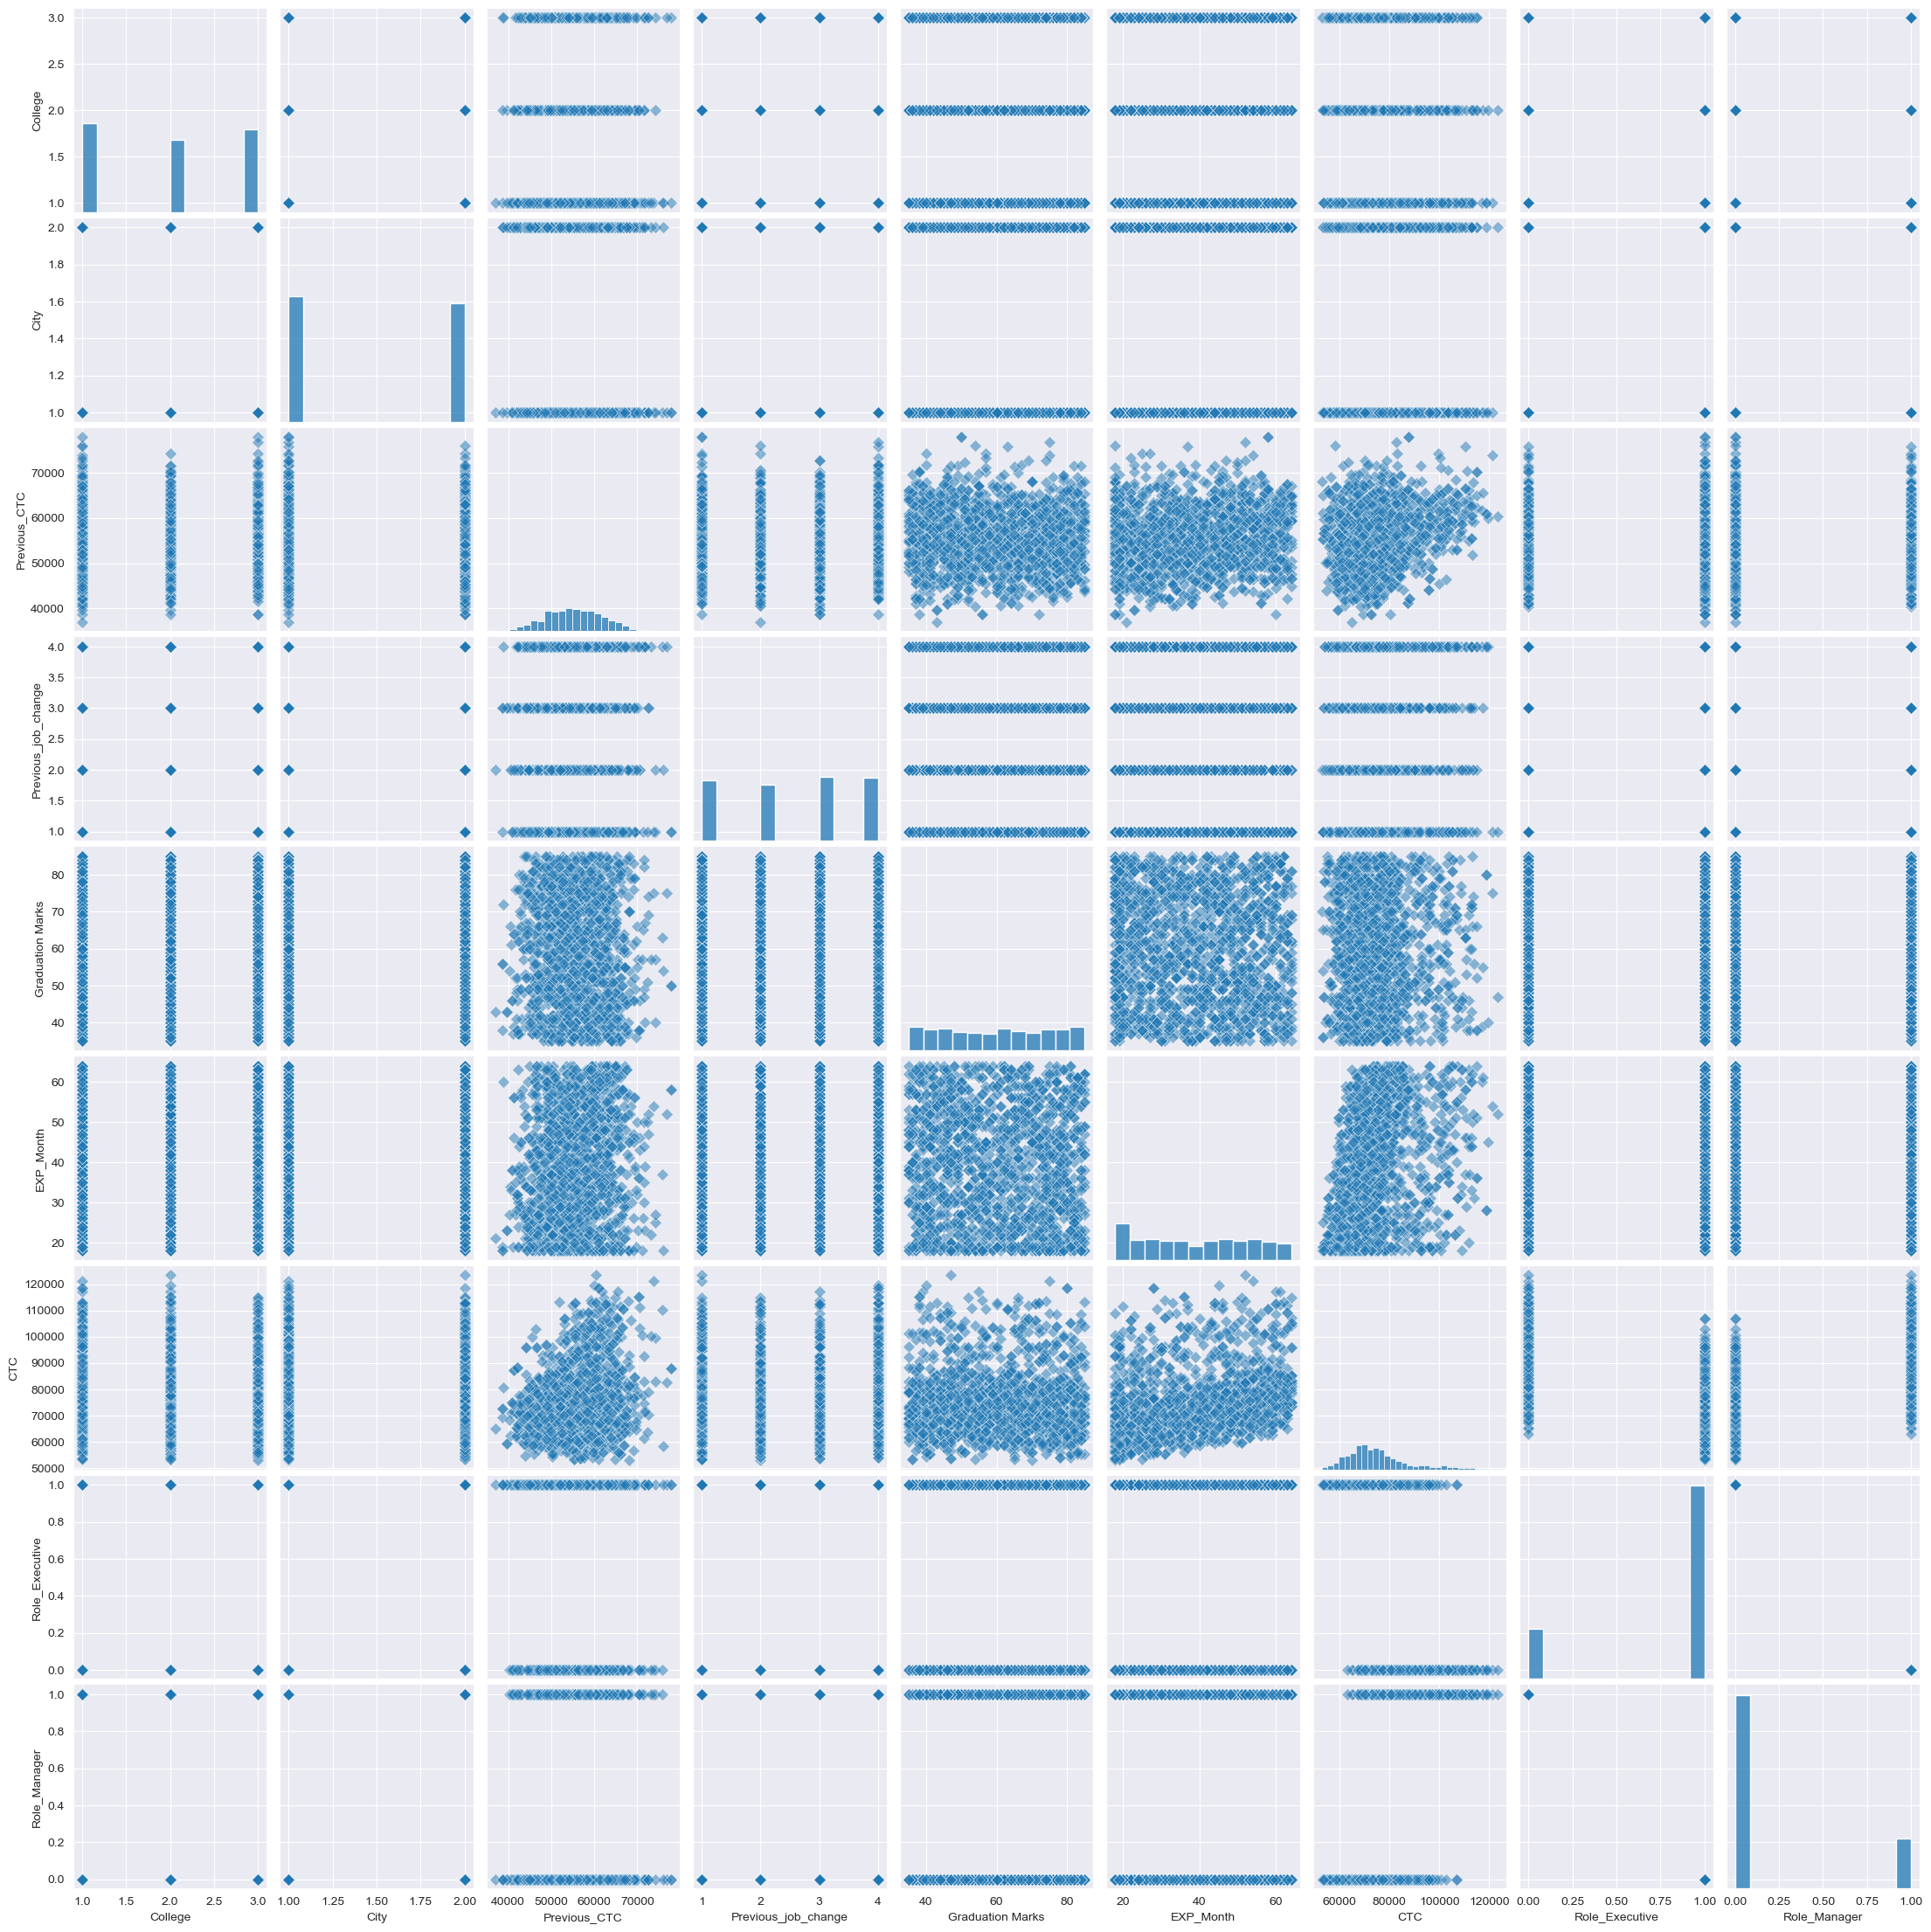

In [40]:
sns.set_style("darkgrid")
sns.pairplot(df1,diag_kind="auto",markers="D",plot_kws={"alpha": 0.5, "s": 50})
plt.show()

##### Explanation

* sns.pairplot: This function is from the Seaborn library and is used to create a pair plot.

* df1: This is presumably a pandas DataFrame containing the data to be plotted.

* diag_kind="auto": This parameter specifies the type of plot to be shown along the diagonal. In this case, it's set to "auto", which means Seaborn will automatically choose the type of plot based on the data. It could be a histogram or a kernel density estimate (KDE).

* markers="D": This parameter sets the marker style for the scatterplot points. "D" represents a diamond-shaped marker.

* plot_kws={"alpha": 0.5, "s": 50}: This parameter allows passing additional keyword arguments to the underlying plt.scatter function used to plot the data points. Here, it sets the transparency (alpha) of the markers to 0.5 (making them somewhat transparent) and the size (s) of the markers to 50.

* plt.show(): This command displays the plot.

### Linear Regression Model

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
X_multi = df1.drop('CTC', axis=1)
y_multi = df1['CTC']

In [43]:
X_multi.head()

College  City  Previous_CTC  Previous_job_change  Graduation Marks  \
0        2     2         55523                    3                66   
1        2     2         57081                    1                84   
2        3     2         60347                    2                52   
3        3     2         49010                    2                81   
4        1     2         57879                    4                74   

   EXP_Month  Role_Executive  Role_Manager  
0         19               0             1  
1         18               1             0  
2         28               1             0  
3         33               1             0  
4         32               1             0

In [44]:
y_multi.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [45]:
import statsmodels.api as sm

In [46]:
X_multi_cons = sm.add_constant(X_multi)
X_multi_cons.head()

const  College  City  Previous_CTC  Previous_job_change  Graduation Marks  \
0    1.0        2     2         55523                    3                66   
1    1.0        2     2         57081                    1                84   
2    1.0        3     2         60347                    2                52   
3    1.0        3     2         49010                    2                81   
4    1.0        1     2         57879                    4                74   

   EXP_Month  Role_Executive  Role_Manager  
0         19               0             1  
1         18               1             0  
2         28               1             0  
3         33               1             0  
4         32               1             0

In [47]:
lm_multi = sm.OLS(y_multi,X_multi_cons).fit()
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Fri, 29 Mar 2024   Prob (F-statistic):          4.70e-257
Time:                        11:33:53   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.262e+04   1519.863     21.461      0.000    2.96e+04    3.56e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                 -380.8308    433.455     -0.879      0.380   -1231.039     469.377
Previous_CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous_job_change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP_Month             261.3444     15.460     16.904      0.000     231.020     291.669
Role_Executive       6565.1145    783.099      8.384      0.000    5029.093    8101.136
Role_Manager         2.605e+04    827.464     31.485      0.000    2.44e+04    2.77e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     1.03e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.66e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:
lm_multi2 = LinearRegression()
lm_multi2.fit(X_multi,y_multi)
print(lm_multi2.intercept_,lm_multi2.coef_)

48926.48530946924 [-4.81514705e+02 -3.80830787e+02  4.10090279e-01  1.26565295e+02
  6.23621203e+00  2.61344394e+02 -9.74371393e+03  9.74371393e+03]


##### Explanation

* At first we are importing the model Linear regression.
* Now we use the drop command to to remove the dependant variable from X and put it on y.
* Then we import statsmodel.api to do the OLS calculation.
* X_multi_cons = sm.add_constant(X_multi): This line adds a constant value (usually 1s) to each row in your dataset of features. 

* lm_multi = sm.OLS(y_multi, X_multi_cons).fit(): Here, you're fitting a straight line to your data points. The sm.OLS() function stands for "Ordinary Least Squares," which is a method to find the best-fitting line for your data. It tries to minimize the sum of the squared differences between the actual data points and the points predicted by the line. The fit() function then calculates the coefficients (slopes) of the line.

* lm_multi.summary(): This line prints out a summary of the straight line that was just fitted to your data. It includes useful information like the coefficients (slopes), p-values (which indicate the significance of each coefficient), and goodness-of-fit statistics (like R-squared, which tells you how well the line fits the data).

* print(lm_multi2.intercept_, lm_multi2.coef_): Finally, this line prints out the intercept (the value where the line crosses the y-axis) and the coefficients (slopes) of the straight line that was just fitted using scikit-learn.

### Test-Train Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train , X_test ,y_train, y_test = train_test_split(X_multi, y_multi , test_size=0.2 , random_state=0)
print(X_train.shape , X_test.shape,y_train.shape,y_test.shape)

(1271, 8) (318, 8) (1271,) (318,)


In [51]:
X_train.head()

College  City  Previous_CTC  Previous_job_change  Graduation Marks  \
1062        1     2         61410                    4                83   
215         1     1         59781                    1                46   
654         1     2         62521                    1                70   
55          1     2         66624                    1                63   
1187        3     2         54621                    2                52   

      EXP_Month  Role_Executive  Role_Manager  
1062         59               0             1  
215          41               1             0  
654          59               1             0  
55           58               0             1  
1187         62               1             0

In [52]:
lm_a = LinearRegression()
lm_a.fit(X_train,y_train)
y_test_pred = lm_a.predict(X_test)
y_train_pred = lm_a.predict(X_train)

In [53]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared scores
test_r2=r2_score(y_test,y_test_pred)
train_r2=r2_score(y_train,y_train_pred)

# Calculate Mean Squared Errors
test_mse = mean_squared_error(y_test,y_test_pred)
train_mse = mean_squared_error(y_train,y_train_pred)

# Print R-squared scores and MSE
print("Test R-squared Score:", test_r2)
print("Train R-squared Score:", train_r2)
print("Test Mean Squared Error:", test_mse)
print("Train Mean Squared Error:", train_mse)


Test R-squared Score: 0.5355989894790123
Train R-squared Score: 0.5331293335456955
Test Mean Squared Error: 68909870.69952513
Train Mean Squared Error: 75086299.73658578


##### Explanation

1. Splitting the Data:

* train_test_split(X_multi, y_multi, test_size=0.2, random_state=0): This function divides your data into two parts - training and testing sets.
* X_multi contains the features (like age, income, etc.) of your dataset.
* y_multi contains the corresponding target values (like house prices).

* test_size=0.2 means 20% of the data will be used for testing, and 80% for training.
random_state=0 ensures that the data is split in the same way each time you run the code, providing consistency for reproducibility.

2. Training the Linear Regression Model:

* lm_a = LinearRegression(): This line creates a linear regression model.
* lm_a.fit(X_train, y_train): It trains the model on the training data (X_train features and y_train target values).
Making Predictions:

* y_test_pred = lm_a.predict(X_test): Predicts the target values for the test data using the trained model.
* y_train_pred = lm_a.predict(X_train): Predicts the target values for the training data.

3. Evaluating the Model:

* r2_score(y_test, y_test_pred): Calculates the R-squared score, which measures how well the predictions match the actual values. A higher R-squared score indicates better predictions.
* r2_score(y_train, y_train_pred): Calculates the R-squared score for the training data.
* mean_squared_error(y_test, y_test_pred): Calculates the mean squared error (MSE) between the predicted and actual values for the test data. Lower MSE indicates better predictions.
* mean_squared_error(y_train, y_train_pred): Calculates the MSE for the training data.

### Ridge Regression

In [55]:
# Import the preprocessing and Ridge
from sklearn import preprocessing
from sklearn.linear_model import Ridge

# Standardize the features using StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# Create a Ridge regression model with fixed alpha of 0.5
lm_r = Ridge(alpha=0.5)
lm_r.fit(X_train_s, y_train)

# Calculate R-squared score on the test and train set using the Ridge model
r2_ridge_test = r2_score(y_test, lm_r.predict(X_test_s))
r2_ridge_train = r2_score(y_train, lm_r.predict(X_train_s))
print("Test R-squared Score (Ridge):", r2_ridge_test)
print("Train R-squared Score (Ridge):",r2_ridge_train)

# Calculate Mean Squared Error for the test set using the Ridge model
mse_ridge_test = mean_squared_error(y_test, lm_r.predict(X_test_s))
mse_ridge_train = mean_squared_error(y_train,lm_r.predict(X_train_s))
print("Mean Squared Error (Test) - Ridge Regression:", mse_ridge_test)
print("Mean Squared Error (Train) - Ridge Regression:",mse_ridge_train)



Test R-squared Score (Ridge): 0.5355953891144283
Train R-squared Score (Ridge): 0.5331293001617218
Mean Squared Error (Test) - Ridge Regression: 68910404.93750553
Mean Squared Error (Train) - Ridge Regression: 75086305.10569383


##### Explanation 

* The commands which is used for finding the model performance is almost same as linear regression , however there are some changes on importing model that is just import the ridge model and use the Standard scaling and import preprocessing.

#### Now performing the Ridge Regression using the Validation curve and Param Range


Max Test R-squared Score: 0.5258250926516305
Selected Alpha: 1.3219411484660286
Test R-squared Score (Ridge Best): 0.535589339807347
Train R-squared Score (Ridge Best): 0.5331291004061909
Test Mean Squared Error (Ridge Best): 68911302.56037746
Train Mean Squared Error (Ridge Best): 75086337.23215784


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


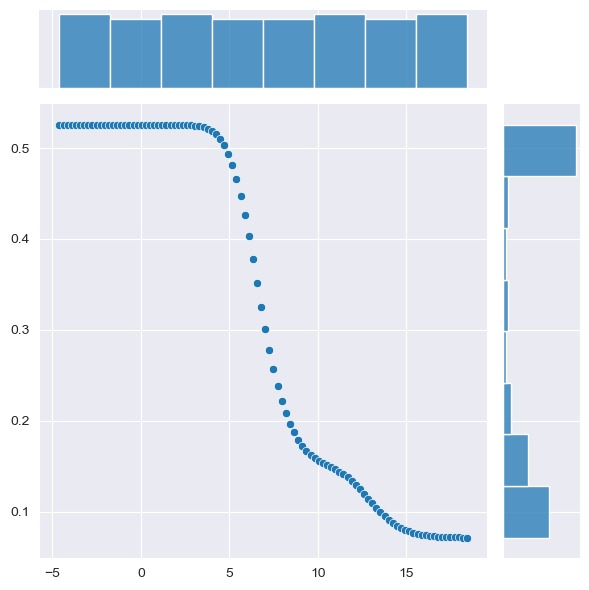

In [56]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.metrics import r2_score, mean_squared_error

param_range = np.logspace(-2, 8, 100)

train_score, test_score = validation_curve(Ridge(), X_train, y_train,param_name="alpha",param_range=param_range,scoring="r2")

train_mean = np.mean(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)

print("Max Test R-squared Score:", max(test_mean))

sns.jointplot(x=np.log(param_range), y=test_mean)

best_alpha_idx = np.where(test_mean == max(test_mean))[0][0]
selected_alpha = param_range[best_alpha_idx]
print("Selected Alpha:", selected_alpha)

lm_r_best = Ridge(alpha=selected_alpha)
lm_r_best.fit(X_train_s, y_train)

# Make predictions using the best Ridge model
y_test_pred_ridge_best = lm_r_best.predict(X_test_s)
y_train_pred_ridge_best = lm_r_best.predict(X_train_s)

# Calculate R-squared scores
test_r2_ridge_best = r2_score(y_test, y_test_pred_ridge_best)
train_r2_ridge_best = r2_score(y_train, y_train_pred_ridge_best)

# Calculate Mean Squared Errors
test_mse_ridge_best = mean_squared_error(y_test, y_test_pred_ridge_best)
train_mse_ridge_best = mean_squared_error(y_train, y_train_pred_ridge_best)

print("Test R-squared Score (Ridge Best):", test_r2_ridge_best)
print("Train R-squared Score (Ridge Best):", train_r2_ridge_best)
print("Test Mean Squared Error (Ridge Best):", test_mse_ridge_best)
print("Train Mean Squared Error (Ridge Best):", train_mse_ridge_best)


##### Explanation 

* First import the validation curve using from sklearn.model_selection import validation_curve

* param_range = np.logspace(-2, 8, 100): This line creates an array of 100 numbers, evenly spaced on a logarithmic scale between 10^-2 and 10^8. This range is typically used for hyperparameter tuning.

* train_score, test_score = validation_curve(Ridge(), X_train, y_train,param_name="alpha",param_range=param_range,scoring="r2"): This line uses the validation_curve function to perform cross-validation on a Ridge regression model. It varies the "alpha" parameter (which controls regularization strength) over the param_range values and calculates training and test scores (in terms of R-squared) for each value.

* train_mean = np.mean(train_score, axis=1) and test_mean = np.mean(test_score, axis=1): These lines compute the mean training and test scores across different folds of cross-validation.

* sns.jointplot(x=np.log(param_range), y=test_mean): This line creates a joint plot using seaborn library, where the x-axis represents the logarithm of the alpha values and the y-axis represents the mean test scores.

* best_alpha_idx = np.where(test_mean == max(test_mean))[0][0] and selected_alpha = param_range[best_alpha_idx]: These lines find the index of the maximum test score and retrieve the corresponding alpha value from param_range. This alpha value is the one that yields the highest test score.

* lm_r_best = Ridge(alpha=selected_alpha): This line creates a Ridge regression model with the selected alpha value.

* lm_r_best.fit(X_train_s, y_train): This line fits the Ridge regression model to the scaled training data (X_train_s).

* y_test_pred_ridge_best = lm_r_best.predict(X_test_s) and y_train_pred_ridge_best = lm_r_best.predict(X_train_s): These lines use the fitted Ridge model to make predictions on both the training and test data.

* Then calculate the r2_score and MSE.

### Lasso Regression with Validation curve

In [57]:
# Import the Lasso 
from sklearn.linear_model import Lasso

# Create a Lasso regression model with alpha=0.5
lm_l = Lasso(alpha=0.5)

# Fit the Lasso regression model on the scaled training data
lm_l.fit(X_train_s, y_train)

# Calculate R-squared score on the test set using the Lasso model
r2_lasso_test = r2_score(y_test, lm_l.predict(X_test_s))
r2_lasso_train = r2_score(y_train, lm_l.predict(X_train_s))
print("R-squared Score (Test) - Lasso Regression:", r2_lasso_test)
print("R-squared Score (Train) - Lasso Regression:",r2_lasso_train)

# Calculate Mean Squared Error for the test set using the Lasso model
mse_lasso_test = mean_squared_error(y_test, lm_l.predict(X_test_s))
mse_lasso_train = mean_squared_error(y_train,lm_l.predict(X_train_s))
print("Mean Squared Error (Test) - Lasso Regression:", mse_lasso_test)
print("Mean Squared Error (Train) - Lasso Regression:",mse_lasso_train)

# Perform Validation curve for Lasso regression
param_range = np.logspace(-2, 8, 100)
train_score, test_score = validation_curve(Lasso(), X_train, y_train, param_name="alpha", param_range=param_range, scoring="r2")
train_mean = np.mean(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
best_alpha_idx = np.where(test_mean == max(test_mean))[0][0]
selected_alpha = param_range[best_alpha_idx]
print("Selected Alpha:", selected_alpha)

# Create a Lasso regression model with the selected alpha
lm_l_best = Lasso(alpha=selected_alpha)

# Fit the Lasso regression model on the scaled training data
lm_l_best.fit(X_train_s, y_train)

# Calculate R-squared score on the test set using the optimized Lasso model
r2_lasso_best_test = r2_score(y_test, lm_l_best.predict(X_test_s))
print("R-squared Score (Test) - Optimized Lasso Regression:", r2_lasso_best_test)

# Calculate Mean Squared Error for the test set using the optimized Lasso model
mse_lasso_best_test = mean_squared_error(y_test, lm_l_best.predict(X_test_s))
print("Mean Squared Error (Test) - Optimized Lasso Regression:", mse_lasso_best_test)

# Calculate R-squared score on the train set using the optimized Lasso model
r2_lasso_best_train = r2_score(y_train, lm_l_best.predict(X_train_s))


R-squared Score (Test) - Lasso Regression: 0.5356055546226256
R-squared Score (Train) - Lasso Regression: 0.5331293230548311
Mean Squared Error (Test) - Lasso Regression: 68908896.5345529
Mean Squared Error (Train) - Lasso Regression: 75086301.42382005
Selected Alpha: 8.497534359086439
R-squared Score (Test) - Optimized Lasso Regression: 0.5357073854860221
Mean Squared Error (Test) - Optimized Lasso Regression: 68893786.42180356


##### Explanation

* The Lasso Regression command functions are same as that of the Ridge Regressio including with validation curve.

* Only import the lasso model using from sklearn.linear_model import Lasso and rest parts are same.

### PCA 


In [58]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Applying PCA
pca = PCA(n_components=0.95) # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Apply a regression model
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Making predictions
y_pred_pca = model.predict(X_test_pca)

# Evaluating the model
print("R-Squared:",r2_score(y_test,y_pred_pca))
print("MSE:", mean_squared_error(y_test, y_pred_pca))



R-Squared: 0.006047073146345783
MSE: 147487120.22409445


##### Explanation

1. PCA (Principal Component Analysis):

* PCA is a technique used for dimensionality reduction. It's commonly applied to datasets with many features to reduce the number of features while preserving most of the important information.

* In this code, PCA(n_components=0.95) means we want to keep 95% of the variance in the data after transformation. This automatically determines the number of principal components needed to retain that amount of variance.
* X_train_pca = pca.fit_transform(X_train): This line fits the PCA model to the training data (X_train) and transforms it into a new dataset (X_train_pca) with reduced dimensions.
* X_test_pca = pca.transform(X_test): This line transforms the test data (X_test) using the same PCA transformation learned from the training data.

2. Regression Model:

* model = LinearRegression(): Here, we're creating a linear regression model. Linear regression is a technique used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data.
* model.fit(X_train_pca, y_train): This line fits the linear regression model to the transformed training data (X_train_pca) and corresponding target values (y_train).

3. Making Predictions:

* y_pred_pca = model.predict(X_test_pca): This line uses the trained linear regression model to make predictions on the transformed test data  (X_test_pca). It predicts the target variable (y_pred_pca) based on the reduced-dimensional input features.

4. Model Evaluation:

* r2_score(y_test, y_pred_pca): R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by independent variables in a regression model. It indicates the goodness of fit of the model. Higher values of R2 indicate better fit.

* mean_squared_error(y_test, y_pred_pca): Mean Squared Error (MSE) is a measure of the average squared difference between actual and predicted values. Lower values of MSE indicate better performance of the model.

## Ensemble Techniques 

### Decision Tree Regression

In [59]:
# Import Tree model 

from sklearn import tree 
from sklearn.metrics import r2_score , mean_squared_error

# Create a DecisionTreeRegressor
regtree = tree.DecisionTreeRegressor(max_depth=3)

# Create a Predict model 
regtree.fit(X_train,y_train)
y_train_pred_regtree = regtree.predict(X_train)
y_test_pred_regtree = regtree.predict(X_test)

# Evaluting the model
print("R-squared-train:",r2_score(y_train,y_train_pred_regtree))
print("MSE-Train:",mean_squared_error(y_train,y_train_pred_regtree))
print("R-squared-test:",r2_score(y_test,y_test_pred_regtree))
print("MSE-test:",mean_squared_error(y_test,y_test_pred_regtree))

R-squared-train: 0.6137194061789908
MSE-Train: 62125086.31211998
R-squared-test: 0.5927831611924914
MSE-test: 60424631.02613471


##### Explanation 

* Import the Tree Model

* regtree = tree.DecisionTreeRegressor(max_depth=3): Here, we create an instance of the DecisionTreeRegressor class from the tree module. We set the parameter max_depth to 3, which controls the maximum depth of the decision tree. A smaller max_depth helps prevent overfitting.

* regtree.fit(X_train, y_train): This line fits (trains) the decision tree model using the training data X_train (features) and y_train (target variable). It learns the patterns in the data to make predictions.

* y_train_pred_regtree = regtree.predict(X_train): This line predicts the target variable (y) for the training data using the trained decision tree model. The predicted values are stored in the variable y_train_pred_regtree.

* y_test_pred_regtree = regtree.predict(X_test): Similarly, this line predicts the target variable for the test data (X_test) using the trained decision tree model. The predicted values are stored in the variable y_test_pred_regtree.

* Find the r2_score and MSE for train and test data.

### Plotting Decision Trees

#### Maximum number of levels in tree

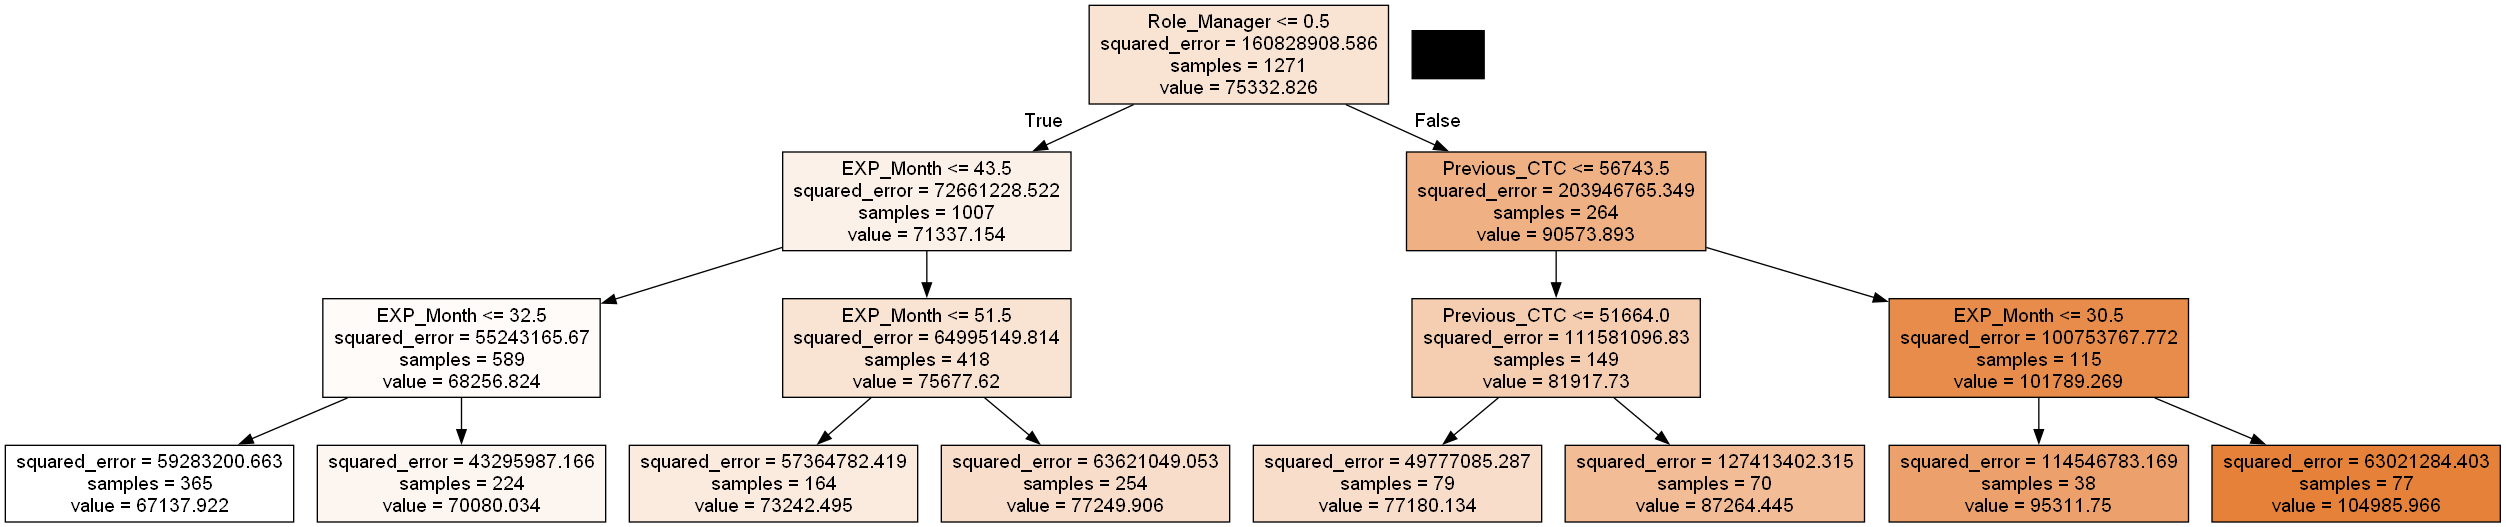

In [60]:
#Import Image for Tree 
dot_data = tree.export_graphviz(regtree,out_file=None,feature_names=X_train.columns,filled=True)
from IPython.display import Image 

# Import pydotplus for displaying the Tree chart
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### Minimum observations at internal node

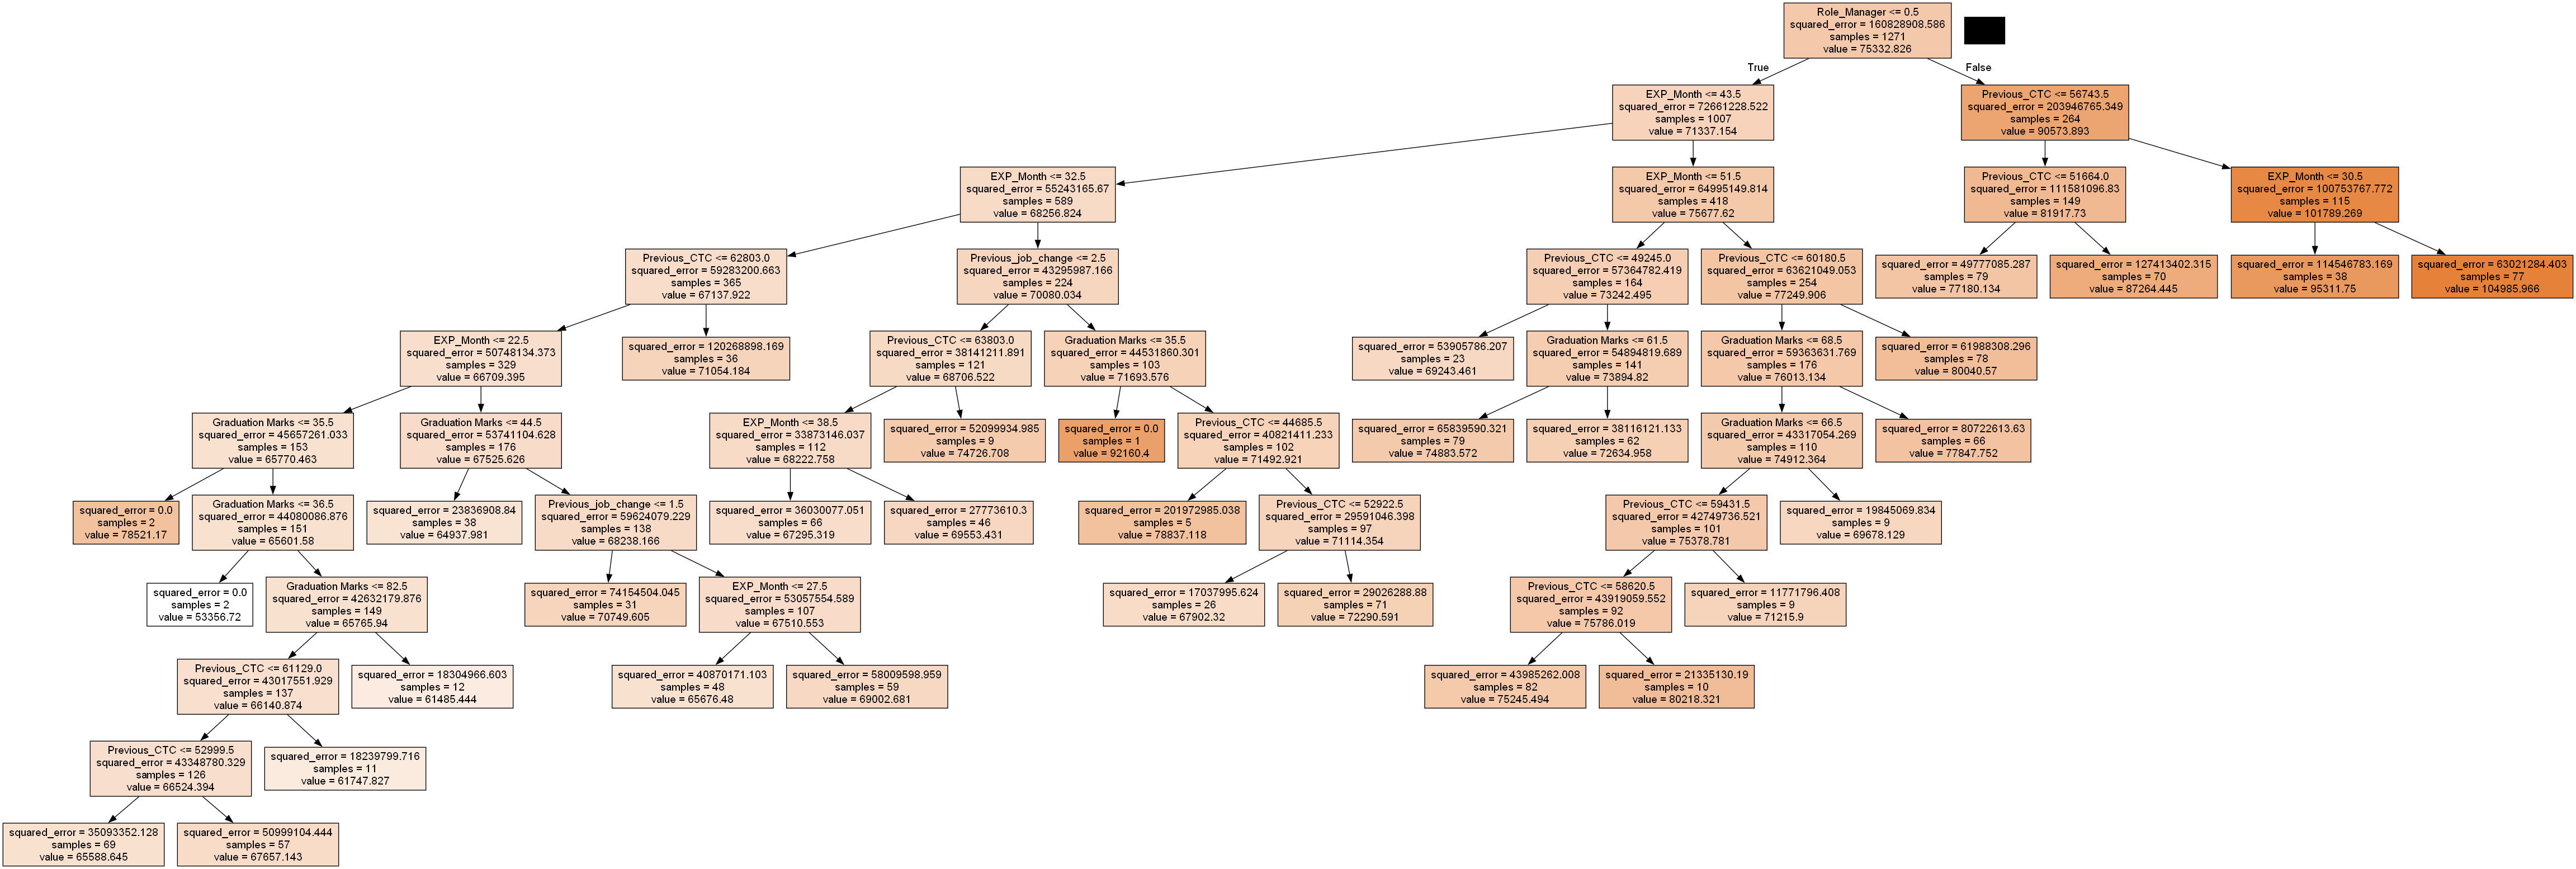

In [111]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split= 90)
regtree2.fit(X_train,y_train)
dot_data = tree.export_graphviz(regtree2, out_file=None, feature_names=X_train.columns,filled= True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

##### Explanation 

1. dot_data = tree.export_graphviz(regtree, out_file=None, feature_names=X_train.columns, filled=True)

* tree.export_graphviz() function is used to export a decision tree in DOT format, which is a plain text graph description language.
regtree is a trained decision tree model.
* out_file=None specifies that the output should not be written to a file but stored in the variable dot_data.

* feature_names=X_train.columns provides the names of the features (columns) of the dataset used to train the decision tree.
* filled=True indicates whether to fill the decision tree nodes with colors representing class distributions.

2. from IPython.display import Image

* This imports the Image class from the IPython.display module. This class is used to display images in Jupyter notebooks or IPython environments.

3. import pydotplus

* This imports the pydotplus module, which provides a Python interface to Graphviz's Dot language.

4. graph = pydotplus.graph_from_dot_data(dot_data)

* pydotplus.graph_from_dot_data() function converts the DOT format data stored in dot_data into a graph object.

5. Image(graph.create_png())

* graph.create_png() generates a PNG image of the decision tree graph.
* Image() function displays the generated PNG image.

6. regtree2 = tree.DecisionTreeRegressor(min_samples_split=90)

* This line creates a new decision tree regressor model (regtree2) with a specified parameter min_samples_split=90.
min_samples_split is the minimum number of samples required to split an internal node during the tree building process. In this case, it's set to 90, meaning that the tree will stop splitting nodes further if the number of samples at a node is less than 90.

##### Note 

* The tree chart for the min_sample_splits is large so use the zoom tool and see the tree chart.


### Bagging Decision Tree Regression

In [61]:
# Import Tree model 

from sklearn import tree 
from sklearn.metrics import r2_score , mean_squared_error

# Create a DecisionTreeRegressor
regtree1 = tree.DecisionTreeRegressor()

# Import Bagging Regressor 
from sklearn.ensemble import BaggingRegressor

# Create a Bagging Regressor with the decision tree Regressor at the base estimator and then fit the data 
regtree1 = tree.DecisionTreeRegressor()
bag_clf = BaggingRegressor(estimator=regtree1, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

# Calculate R-squared score on the test set using the BaggingRegressor
r2_bagging_test = r2_score(y_test, bag_clf.predict(X_test))
mse_bagging_test = mean_squared_error(y_test,bag_clf.predict(X_test))
print("R-squared Score (Test) - Bagging Regressor:", r2_bagging_test)
print("MSE(Test) - Bagging Regressor:",mse_bagging_test)

R-squared Score (Test) - Bagging Regressor: 0.6600828917710917
MSE(Test) - Bagging Regressor: 50438400.102387324


### Using GridSearch on Bagging Regrssion

In [62]:
# Import GridsearchCV
from sklearn.model_selection import GridSearchCV

# GridSearch for BaggingRegressor
param_grid_bagging = {
    'n_estimators': [100, 250, 500, 1000],
    'max_samples': [0.5, 0.7, 0.8],
    'max_features': [0.5, 0.7, 0.8]
}

grid_search_bagging = GridSearchCV(estimator=BaggingRegressor(estimator=regtree1, random_state=42),param_grid=param_grid_bagging,scoring='r2',
n_jobs=-1,cv=5)

grid_search_bagging.fit(X_train, y_train)

best_bagging_model = grid_search_bagging.best_estimator_

# Calculate R-squared score and MSE on the test set using the best BaggingRegressor
y_test_pred_bagging = best_bagging_model.predict(X_test)
y_train_pred_bagging = best_bagging_model.predict(X_train)
r2_bagging_best_test = r2_score(y_test, y_test_pred_bagging)
r2_bagging_best_train = r2_score(y_train, y_train_pred_bagging)
mse_bagging_best_test = mean_squared_error(y_test, y_test_pred_bagging)
mse_bagging_best_train = mean_squared_error(y_train, y_train_pred_bagging)

print("R-squared Score (Test) - Best Bagging Regressor:", r2_bagging_best_test)
print("Mean Squared Error (Test) - Best Bagging Regressor:", mse_bagging_best_test)
print("R-squared Score (Train) - Best Bagging Regressor:", r2_bagging_best_train)
print("Mean Squared Error (Train) - Best Bagging Regressor:", mse_bagging_best_train)

R-squared Score (Test) - Best Bagging Regressor: 0.6504783143074571
Mean Squared Error (Test) - Best Bagging Regressor: 51863569.67813854
R-squared Score (Train) - Best Bagging Regressor: 0.906174618335668
Mean Squared Error (Train) - Best Bagging Regressor: 15089833.730723629


##### Explanation

##### Bagging codes without GridsearchSV

1. Create a DecisionTreeRegressor:
* A DecisionTreeRegressor is a model that predicts the target variable by learning simple decision rules inferred from the data features.

2. Import Bagging Regressor:
* Bagging stands for Bootstrap Aggregating. It's an ensemble method where multiple models are trained on different subsets of the data and their predictions are combined.
* BaggingRegressor is a specific implementation of this technique for regression tasks.

3. Create a Bagging Regressor with the decision tree Regressor at the base estimator and then fit the data:
* We create a BaggingRegressor object, specifying that we want to use DecisionTreeRegressor as the base estimator.
* n_estimators specifies the number of base estimators (in this case, decision trees) to use.
* bootstrap=True means that each base estimator is trained on a random sample of the training data (with replacement).
* n_jobs=-1 means to use all available CPU cores to train the model in parallel.
* random_state=42 is used for reproducibility, ensuring that results are consistent across runs.

4. Calculate R-squared score and Mean Squared Error (MSE) on the test set using the BaggingRegressor:
* R-squared (R2) score measures how well the model fits the data. It ranges from 0 to 1, with 1 indicating a perfect fit.
* Mean Squared Error (MSE) measures the average squared difference between the predicted values and the actual values.
* Here, we're calculating these metrics on the test set to evaluate the performance of the BaggingRegressor.

##### Bagging Codes with Gridsearch

1. Importing GridSearchCV:

* We're importing a function called GridSearchCV from the sklearn.model_selection module. This function helps us perform an exhaustive search over specified parameter values for an estimator.

2. Defining Parameter Grid for BaggingRegressor:

* We're setting up a grid of parameters (param_grid_bagging) that we want to search over when optimizing our BaggingRegressor model. These parameters include:

* n_estimators: Number of base estimators in the ensemble.
* max_samples: Maximum proportion of samples to draw from the training data when building each base estimator.
* max_features: Maximum proportion of features to consider when building each base estimator.

3. Setting up GridSearchCV:

We're initializing a GridSearchCV object (grid_search_bagging) with the following parameters:

* estimator: The base estimator to be fitted (in this case, BaggingRegressor with a decision tree estimator (regtree1) inside).
* param_grid: The parameter grid to search over.
* scoring: The scoring metric to optimize (in this case, 'r2' which is the coefficient of determination).
* n_jobs: Number of jobs to run in parallel. -1 means using all processors.
* cv: Number of folds in cross-validation.

4. Fitting GridSearchCV:
We're fitting the grid_search_bagging object to our training data (X_train and y_train). This means it will explore different combinations of parameters defined in param_grid_bagging to find the best combination that maximizes the R-squared score.

6. Extracting Best Model:
Once the grid search is complete, we extract the best model (best_bagging_model) that was found during the search.

7. Predictions and Evaluation:
We're using the best BaggingRegressor model to make predictions on both the training and test data. Then we're calculating two evaluation metrics:

R-squared score (r2_score): It measures how well the predictions approximate the actual values. Higher values (close to 1) indicate a better fit.
Mean Squared Error (mean_squared_error): It measures the average squared difference between the predicted values and the actual values. Lower values indicate better performance.

### Random Forest Regression with Gridsearch


In [63]:
# Import Random Forest Regression 
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor with 1000 estimators
rf_clf = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

# Fit the RandomForestRegressor on the training data
rf_clf.fit(X_train, y_train)

# Calculate R-squared score and MSE on the test and train set using the RandomForestRegressor
r2_rf_test = r2_score(y_test, rf_clf.predict(X_test))
r2_rf_train = r2_score(y_train, rf_clf.predict(X_train))
mse_rf_test = mean_squared_error(y_test, rf_clf.predict(X_test))
mse_rf_train = mean_squared_error(y_train, rf_clf.predict(X_train))
print("R-squared Score (Test) - RandomForest Regressor:", r2_rf_test)
print("R-squared Score (Train) - RandomForest Regressor:", r2_rf_train)
print("Mean Squared Error (Test) - RandomForest Regressor:", mse_rf_test)
print("Mean Squared Error (Train) - RandomForest Regressor:", mse_rf_train)

# Perform GridSearchCV for RandomForestRegressor
rf_clf = RandomForestRegressor(n_estimators=1000, random_state=42)
params_grid = {
    "max_features": [4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 3, 10]
}
grid_search = GridSearchCV(rf_clf, params_grid, n_jobs=-1, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
cvrf_clf = grid_search.best_estimator_

# Calculate R-squared score and MSE on the test and train set using the optimized RandomForestRegressor
r2_cv_rf_test = r2_score(y_test, cvrf_clf.predict(X_test))
r2_cv_rf_train = r2_score(y_train, cvrf_clf.predict(X_train))
mse_cv_rf_test = mean_squared_error(y_test, cvrf_clf.predict(X_test))
mse_cv_rf_train = mean_squared_error(y_train, cvrf_clf.predict(X_train))
print("R-squared Score (Test) - Optimized RandomForest Regressor:", r2_cv_rf_test)
print("R-squared Score (Train) - Optimized RandomForest Regressor:", r2_cv_rf_train)
print("Mean Squared Error (Test) - Optimized RandomForest Regressor:", mse_cv_rf_test)
print("Mean Squared Error (Train) - Optimized RandomForest Regressor:", mse_cv_rf_train)



R-squared Score (Test) - RandomForest Regressor: 0.6600342412354573
R-squared Score (Train) - RandomForest Regressor: 0.9506887921317962
Mean Squared Error (Test) - RandomForest Regressor: 50445619.08349218
Mean Squared Error (Train) - RandomForest Regressor: 7930667.742492293
R-squared Score (Test) - Optimized RandomForest Regressor: 0.658778026131587
R-squared Score (Train) - Optimized RandomForest Regressor: 0.9516027701066097
Mean Squared Error (Test) - Optimized RandomForest Regressor: 50632021.82254174
Mean Squared Error (Train) - Optimized RandomForest Regressor: 7783673.662331579


##### Explanation 

* Now the process of Random forest code structure is same as that of bagging regression as they are come under ensemble techniques and the only difference could be is the parameters used on these models. 

### Gradient Boosting Regression 

In [64]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoostingRegressor
gbc_clf = GradientBoostingRegressor()

# Fit the GradientBoostingRegressor on the training data
gbc_clf.fit(X_train, y_train)

# Calculate R-squared score on the test set using the GradientBoostingRegressor
r2_gbc_test = r2_score(y_test, gbc_clf.predict(X_test))
print("R-squared Score (Test) - GradientBoosting Regressor:", r2_gbc_test)

# Calculate Mean Squared Error for the test set using the GradientBoostingRegressor
mse_gbc_test = mean_squared_error(y_test, gbc_clf.predict(X_test))
print("Mean Squared Error (Test) - GradientBoosting Regressor:", mse_gbc_test)

# Create a GradientBoostingRegressor with custom parameters
gbc_clf2 = GradientBoostingRegressor(learning_rate=0.02, n_estimators=1000, max_depth=1)

# Fit the GradientBoostingRegressor with custom parameters on the training data
gbc_clf2.fit(X_train, y_train)

# Calculate R-squared score on the train set using the GradientBoostingRegressor with custom parameters
r2_gbc_train2 = r2_score(y_train, gbc_clf2.predict(X_train))
print("R-squared Score (Train) - Custom GradientBoosting Regressor:", r2_gbc_train2)

# Calculate R-squared score on the test set using the GradientBoostingRegressor with custom parameters
r2_gbc_test2 = r2_score(y_test, gbc_clf2.predict(X_test))
print("R-squared Score (Test) - Custom GradientBoosting Regressor:", r2_gbc_test2)

# Calculate Mean Squared Error for the test set using the GradientBoostingRegressor with custom parameters
mse_gbc_test2 = mean_squared_error(y_test, gbc_clf2.predict(X_test))
print("Mean Squared Error (Test) - Custom GradientBoosting Regressor:", mse_gbc_test2)

# Define parameter grid for GridSearchCV
param_grid_gbc = {
    'n_estimators': [100, 250, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 3, 5]
}

# Create GridSearchCV
grid_search_gbc = GridSearchCV(estimator=GradientBoostingRegressor(),
                                param_grid=param_grid_gbc,
                                scoring='r2',
                                n_jobs=-1,
                                cv=5)

# Fit GridSearchCV on the training data
grid_search_gbc.fit(X_train, y_train)

# Get best GradientBoostingRegressor model from GridSearchCV
best_gbc_model = grid_search_gbc.best_estimator_

# Calculate R-squared score on the test set using the best GradientBoostingRegressor
r2_best_gbc_test = r2_score(y_test, best_gbc_model.predict(X_test))
print("R-squared Score (Test) - Best GradientBoosting Regressor:", r2_best_gbc_test)

# Calculate Mean Squared Error for the test set using the best GradientBoostingRegressor
mse_best_gbc_test = mean_squared_error(y_test, best_gbc_model.predict(X_test))
print("Mean Squared Error (Test) - Best GradientBoosting Regressor:", mse_best_gbc_test)



R-squared Score (Test) - GradientBoosting Regressor: 0.6121201862686239
Mean Squared Error (Test) - GradientBoosting Regressor: 57555317.93783009
R-squared Score (Train) - Custom GradientBoosting Regressor: 0.5553367824664439
R-squared Score (Test) - Custom GradientBoosting Regressor: 0.5235431944604294
Mean Squared Error (Test) - Custom GradientBoosting Regressor: 70698762.7499075
R-squared Score (Test) - Best GradientBoosting Regressor: 0.6121575747914614
Mean Squared Error (Test) - Best GradientBoosting Regressor: 57549770.0638677


##### Explanation 

* Similarly like the Bagging Regression the codes structure is same and only difference we could see here is selecting parameters and importing gradient boosting regression model.

### ADA Boosting Regression

In [65]:
# Import ADABoosting Regressor
from sklearn.ensemble import AdaBoostRegressor

# Create an AdaBoostRegressor with custom parameters
ada_clf = AdaBoostRegressor(learning_rate=0.05, n_estimators=1000)

# Fit the AdaBoostRegressor on the training data
ada_clf.fit(X_train, y_train)

# Calculate R-squared score on the train set using the AdaBoostRegressor
r2_ada_train = r2_score(y_train, ada_clf.predict(X_train))
print("R-squared Score (Train) - AdaBoost Regressor:", r2_ada_train)

# Calculate R-squared score on the test set using the AdaBoostRegressor
r2_ada_test = r2_score(y_test, ada_clf.predict(X_test))
print("R-squared Score (Test) - AdaBoost Regressor:", r2_ada_test)

# Define parameter grid for GridSearchCV
param_grid_ada = {
    'n_estimators': [100, 250, 500],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create GridSearchCV
grid_search_ada = GridSearchCV(estimator=AdaBoostRegressor(),
                                param_grid=param_grid_ada,
                                scoring='r2',
                                n_jobs=-1,
                                cv=5)

# Fit GridSearchCV on the training data
grid_search_ada.fit(X_train, y_train)

# Get best AdaBoostRegressor model from GridSearchCV
best_ada_model = grid_search_ada.best_estimator_

# Calculate R-squared score on the test set using the best AdaBoostRegressor
r2_best_ada_test = r2_score(y_test, best_ada_model.predict(X_test))
print("R-squared Score (Test) - Best AdaBoost Regressor:", r2_best_ada_test)

# Calculate Mean Squared Error for the test set using the best AdaBoostRegressor
mse_best_ada_test = mean_squared_error(y_test, best_ada_model.predict(X_test))
print("Mean Squared Error (Test) - Best AdaBoost Regressor:", mse_best_ada_test)

# Import the mean_squared_error function
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error for the train set using the AdaBoostRegressor
mse_ada_train = mean_squared_error(y_train, ada_clf.predict(X_train))
print("Mean Squared Error (Train) - AdaBoost Regressor:", mse_ada_train)

# Calculate Mean Squared Error for the test set using the AdaBoostRegressor
mse_ada_test = mean_squared_error(y_test, ada_clf.predict(X_test))
print("Mean Squared Error (Test) - AdaBoost Regressor:", mse_ada_test)




R-squared Score (Train) - AdaBoost Regressor: 0.626066651090252
R-squared Score (Test) - AdaBoost Regressor: 0.5975778415385544
R-squared Score (Test) - Best AdaBoost Regressor: 0.6135282614644109
Mean Squared Error (Test) - Best AdaBoost Regressor: 57346381.52839369
Mean Squared Error (Train) - AdaBoost Regressor: 60139292.38899989
Mean Squared Error (Test) - AdaBoost Regressor: 59713175.20410259


##### Explaination 

* The ADA Boosting model also represent the similar idea based on their code structure as they also are same and difference will be the parameters used on this model and model importing.

### Graph on ADA Boost Regressor

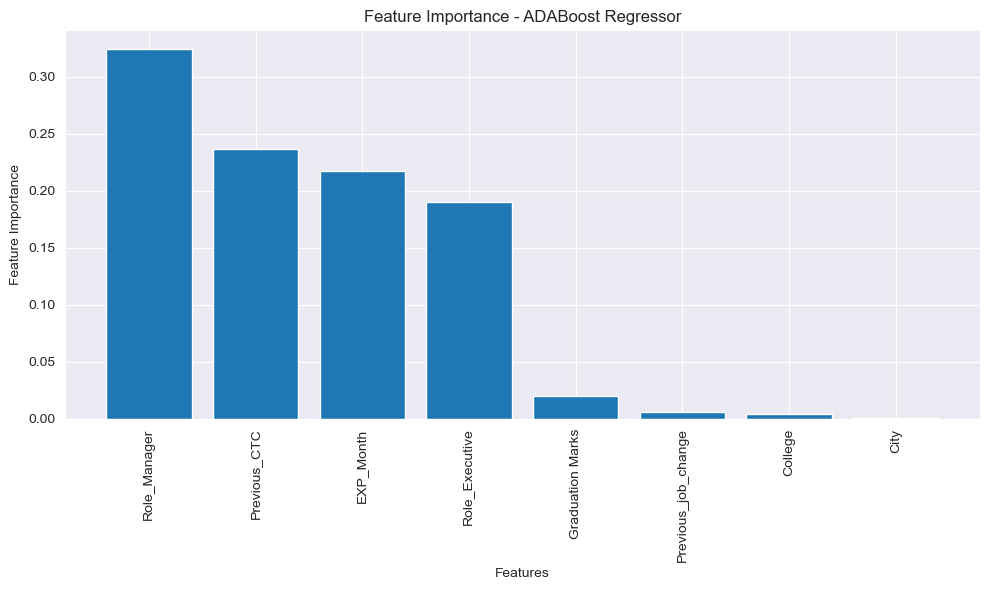

In [66]:
# Get feature importances from the AdaBoostRegressor
feature_importances = ada_clf.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx])
plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance - ADABoost Regressor")
plt.tight_layout()
plt.show()

##### Explaination

1. Getting Feature Importances:

* feature_importances = ada_clf.feature_importances_: This line calculates the importance of each feature in your AdaBoostRegressor model. Feature importance tells you how much each feature contributes to predicting the target variable.

2. Getting Feature Names:

* feature_names = X_train.columns: Here, it grabs the names of all the features from your training data. X_train typically represents your input data or features, and .columns gives you the names of those features.

3. Sorting Feature Importances:

* sorted_idx = feature_importances.argsort()[::-1]: This line sorts the feature importances in descending order. It tells you which features are most important to least important in predicting your target variable.

4. Plotting Feature Importances:

* plt.figure(figsize=(10, 6)): This line creates a new figure for your plot with a specific size (10 inches wide and 6 inches tall).

* plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx]): This line creates a bar plot where each bar represents the importance of a feature. The range(X_train.shape[1]) ensures that there is one bar for each feature, and feature_importances[sorted_idx] provides the importance values in the sorted order.
* plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation=90): This sets the names of the features on the x-axis of the plot. The rotation=90 argument rotates the names by 90 degrees for better readability.
* plt.xlabel("Features"): This sets the label for the x-axis as "Features".
* plt.ylabel("Feature Importance"): This sets the label for the y-axis as "Feature Importance".
* plt.title("Feature Importance - ADABoost Regressor"): This sets the title of the plot.
* plt.tight_layout(): This adjusts the layout of the plot to prevent overlapping elements.
* plt.show(): Finally, this command displays the plot.

### XG Boosting Regression

R-squared Score (Test) - XGBoost Regressor: 0.6114577668816839
R-squared Score (Train) - XGBoost Regressor: 0.9845840665216274


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

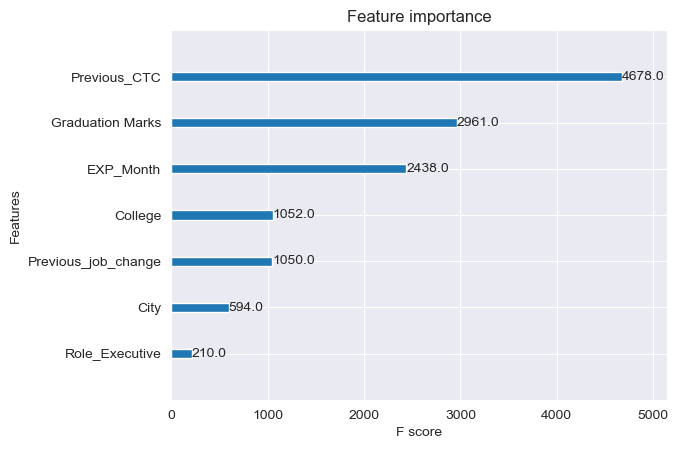

In [67]:
# Import XG Bossting REgression 
import xgboost as xgb

# Create an XGBoost regressor
xgb_clf = xgb.XGBRegressor(max_depth=5, n_estimators=500, learning_rate=0.1, n_jobs=-1)

# Fit the XGBoost regressor on the training data
xgb_clf.fit(X_train, y_train)

# Calculate R-squared score on the test set using the XGBoost regressor
r2_xgb_test = r2_score(y_test, xgb_clf.predict(X_test))
r2_xgb_train = r2_score(y_train,xgb_clf.predict(X_train))
print("R-squared Score (Test) - XGBoost Regressor:", r2_xgb_test)
print("R-squared Score (Train) - XGBoost Regressor:",r2_xgb_train)

# Plot feature importance using XGBoost's built-in method
xgb.plot_importance(xgb_clf)


### XG Boosting using GridSearch

In [68]:
# Create a parameter grid for GridSearchCV
param_test1 = {
    'max_depth': range(3, 10, 2),
    'gamma': [0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'reg_alpha': [1e-2, 0.1, 1]
}

# Create a GridSearchCV instance for XGBoost regressor
grid_search = GridSearchCV(xgb_clf, param_test1, n_jobs=-1, cv=5, scoring='r2')

# Fit the GridSearchCV instance to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=500,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='r2')

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'max_depth': 9, 'reg_alpha': 0.01, 'subsample': 0.9}
R-squared Score (Test) - Best Model: 0.6530462325873072
R-squared Score (Train) - Best Model: 0.9999999226928952
Mean Squared Error (Test) - XGBoost Regressor: 57653610.648803495
Mean Squared Error (Test) - Best Model: 51482530.63510781
Mean Squared Error (Train) - XGBoost Regressor: 2479327.756158442
Mean Squared Error (Train) - Best Model: 12.43321730023503


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

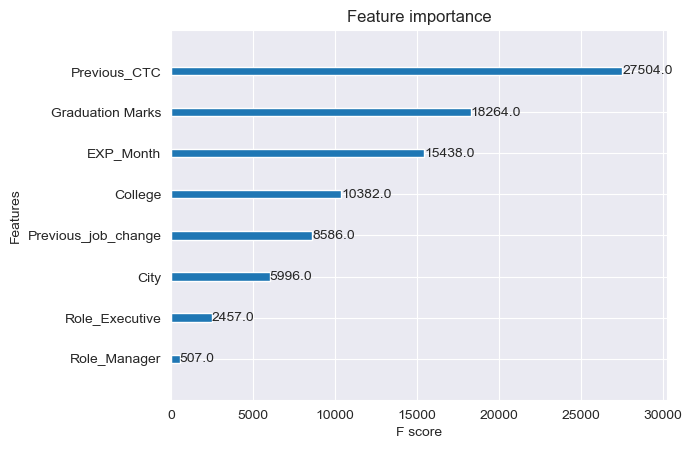

In [71]:
# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Get the best model with the best parameters
best_model = grid_search.best_estimator_

# Calculate R-squared score for the test set using the best model
y_pred_test = best_model.predict(X_test)
r2_test_best = r2_score(y_test, y_pred_test)
print("R-squared Score (Test) - Best Model:", r2_test_best)

# Calculate R-squared score for the train set using the best model
y_pred_train_best = best_model.predict(X_train)
r2_train_best = r2_score(y_train, y_pred_train_best)
print("R-squared Score (Train) - Best Model:", r2_train_best)

# Calculate Mean Squared Error for the test set using the XGBoost regressor
mse_xgb_test = mean_squared_error(y_test, xgb_clf.predict(X_test))
print("Mean Squared Error (Test) - XGBoost Regressor:", mse_xgb_test)

# Calculate Mean Squared Error for the test set using the best model
mse_test_best = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (Test) - Best Model:", mse_test_best)

# Calculate Mean Squared Error for the train set using the best model
mse_xgb_train = mean_squared_error(y_train,xgb_clf.predict(X_train))
print("Mean Squared Error (Train) - XGBoost Regressor:",mse_xgb_train)

# Calculate Mean Squared Error for the train set using the best model
mse_train_best = mean_squared_error(y_train, y_pred_train_best)
print("Mean Squared Error (Train) - Best Model:", mse_train_best)

#plot the feature importance for the Xgboost best model
xgb.plot_importance(best_model)

##### Explanation 

* The XGboost and Ada boost codes represent the same structure and they have same code format except for the parameters used on gridsearchCV.

### Display all the Model performance in Table 

In [115]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import ShuffleSplit

def find_best_model_using_gridsearchcv(X_multi,y_multi):
    algos = {
        'BaggingRegressor':
        {
            'model': BaggingRegressor(),
            'params':
            {
                'n_estimators' : [1000]
            }
        },
        
        'Random_Forest':
        {
            'model': RandomForestRegressor(),
            'params':
            {
                'n_estimators': [1000]
            }
        },
        
          'XGBRegressor': 
        {
            'model': XGBRegressor(),
            'params': 
            {
                'max_depth': [9],
                'learning_rate': [0.1], 
                'n_estimators': [500],
                'colsample_bytree': [0.8],
                'gamma': [0.2],
                'reg_alpha': [0.01],
                'subsample': [0.9]
            }
        },
        
         'GradientBoostingRegressor':
        {
              'model':GradientBoostingRegressor(),
              'params':
              {
                  'learning_rate' : [0.02],
                  'n_estimators' : [1000],
                  'max_depth': [3]


              }
        },

        'AdaBoostRegressor':
        {
            'model':AdaBoostRegressor(),
            'params':
            {
                'learning_rate' : [0.01],
                'n_estimators' : [250]
            }
        },
        
       

        'Decision_Tree': 
        {
            'model': DecisionTreeRegressor(),
            'params': 
            {
                'max_depth': [3]
            }
        },
        
        'Linear_Regression' : 
        {
            'model': LinearRegression(),
            'params': 
            {
                'fit_intercept': [True, False]
            }
        },
         
        'Lasso': 
        {
            'model': Lasso(),
            'params': 
            {
                'alpha': [0.5],
                'selection': ['random', 'cyclic']
            }
        },
        
        'Ridge':
        {
            'model': Ridge(),
            'params': 
            {
                'alpha': [0.5]
            }
        }
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        print("Running algorithm...")
        print(algo_name)
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X_multi,y_multi)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X_multi, y_multi) 


Running algorithm...
BaggingRegressor
Running algorithm...
Random_Forest
Running algorithm...
XGBRegressor
Running algorithm...
GradientBoostingRegressor
Running algorithm...
AdaBoostRegressor
Running algorithm...
Decision_Tree
Running algorithm...
Linear_Regression
Running algorithm...
Lasso
Running algorithm...
Ridge


model  best_score  \
0           BaggingRegressor    0.659780   
1              Random_Forest    0.658379   
2               XGBRegressor    0.653046   
3  GradientBoostingRegressor    0.615100   
4          AdaBoostRegressor    0.606847   
5              Decision_Tree    0.592783   
6          Linear_Regression    0.535599   
7                      Lasso    0.535605   
8                      Ridge    0.535547   

                                         best_params  
0                             {'n_estimators': 1000}  
1                             {'n_estimators': 1000}  
2  {'colsample_bytree': 0.8, 'gamma': 0.2, 'learn...  
3  {'learning_rate': 0.02, 'max_depth': 3, 'n_est...  
4       {'learning_rate': 0.01, 'n_estimators': 250}  
5                                   {'max_depth': 3}  
6                            {'fit_intercept': True}  
7              {'alpha': 0.5, 'selection': 'cyclic'}  
8                                     {'alpha': 0.5}

* This command is used to display all the test model in the same table so that it is easy to determine the best model without any problem.

### Question and Answers of Case Study

1. Your views about the problem statement?

* So as a data analyst at TechWorks Consulting, I personally find that the problem statement is quite relevenant. Now the reason why I think like that because this task has a lot of involvement on using a machine learning and as this task requries regression models so particularly regression models are used mostly on predicting the salary of newly hired employees based on various features such as their education , experience, pervious salary, etc. This actually aligns so well with the  company's objective  to ensure fair and  competitive compensation for it's employees.
As for the data which is provided contains important features like college tier , city type, perious salary, role etc.,. Preprocessing the data involves handling missing values, outliers and converting categorical variables into numerical form, which is crucial for building an accurate predictive model.
Also Choosing the right regression model is necessary for making accurate perdications and it is also important to experiment with multiple models to comapre them among themselves which is better on accurate results based on performance metrics like mean Squared error , R-squared etc.
Overall,I see this problem statement as an opportunity to apply ML techniques to solve real-world problem faced by Techworks Consulting because by building an predictive model, the company can streamlin it's salary determination process.


2. What will be your approach to solving this task?

So technically as a data analyst this whole case study is vast in terms of solving this problem but I have a proper approach for solving this task step by step;

* At first I will import all the necessary libraries like numpy, pandas , seaborn etc. 

* Then I will load the 3 csv files given to us on the problem statement and then analysis it . After that I will use the colleges csv data where there are 3 columns Tier 1,2,3 and use the tolist command to change the college column on the first table where it mention as colleges name and change it to numeric data like 1,2,3 so that we can use the models and similarly I will do the same for cities csv file and change them to 0,1.

* Now I will use the the dummies command and find the dummy data for categorial variable into boolean values and then use astype command to change them into integer value . 

* Now I will check if the data contains any missing or null values into it or not , then describe the data in terms of the mean,count,std,25%,50%,75% etc. and fin there correlation with each other. 

* At this point I have my data ready with no missing values and no Categorial variable so, I can perform various type of graph between the variables like the jointplot command which represents the the scatterplot along with some histogram data , barplot command to display the bar graph , boxplot command to display some box plot graphs and finally some regression based graphs.

* After displaying all the graphs I will start importing the regression models starting with linear regression  and use the CTC column as dependent variable and drop it from X variable and put it on the y variable. After that I will import statsmodel.api for finding the OLS model and then find linear regression intercept and coef.

* Now after this I will import the train test split model from sklearn library and define a variable which splits the data into train model and test model where train model contains 80% of the data and test model contains 20% of the data.

* Now I will perform linear regression based on the train and test data set where I will start predicting the values for test and train data sets and find the r2_score and MSE. Similarly I will use the other regression models like Ridge and Lasso regression models and check there r2_score and MSE.

* After this I will perform PCA which is a technique used for dimensionality reduction. It's commonly applied to datasets with many features to reduce the number of features while preserving most of the important information.

* Then I will perform the ensemble techniques which is used for increasing the model performance by having increasing the r2_score to further boost the model performance . Some of those techniques are Decision Trees , Bagging Regression , Random Forest , Gradient Boosting Regression etc.

* At last but not least I will perform a command which display all the test scores together to have a better representation for the r2_scores in one single place.

3. What were the available ML model options you had to perform this task?

There are so many ML regression models which I had to perform in this task so I am going to list them all step by step;

* At very first and simple regression model which i need to perform is the linear regression model where I have perform the linear regression based on test and train data and usually it is very simple regression model which does not contain any specific parameters.

* Unlike Linear regression the other regression models like the ridge regression and lasso regression contains a one parameter which is mostly used for finding the r2_score and MSE that is by defining the the alpha = 0.5 which helps in consistency to the model performance.

* Now another model which is used that is a little bit different as it is PCA which is known as Principal Component Analysis which is used for dimensionality reduction. It's commonly applied to datasets with many features to reduce the number of features while preserving most of the important information.In this code, PCA(n_components=0.95) means we want to keep 95% of the variance in the data after transformation. This automatically determines the number of principal components needed to retain that amount of variance.

* After all this I have  started the  ensemble techniques regression where First I have started with decision tree regression and find its r2_score and MSE and finally I used the graphviz command to generate a tree graph.

* Now I have used the different regression based on ensemble methods like the Bagging Regression and Random Forest Regression which has some criteria based on the n_estimators and will used some gridsearchCV method on this Regression model to further improve it's score.

* Now from here I have used the first boosting regression techniques  named as Gradient Boosting regression where I import the the gradient boosting method and then I use the same parameters including n_estimators and some new adde parameters like the learning rate = 0.02 adn max_depth = 1.

* Similarly , I will have used the ADA boosting and the XGboosting Techniques too as a regression model to determine the re_score and MSE with the parameters like learning Rate , n_estimators and max_depth.

4. Which model’s performance is best and what could be the possible reason for that?

On this task the best model performance which I got is from the Bagging Regression and their could be several reasons for that which I will tell step by step;

* One thing is that Bagging is a ensemble method that combines multiple models (typically decision trees) to improve performance. It reduces overfitting by averaging the predictions of multiple base models trained on different subsets of the data. 

* Another thing is that Bagging tends to be robust to overfitting because it averages predictions from multiple models. 

* Bagging reduces variance by training multiple models on different subsets of the data and averaging their predictions. This can lead to more stable and reliable predictions, especially when dealing with complex relationships between features and target variables.

* Bagging is generally less sensitive to hyperparameters compared to other ensemble methods like boosting.

* Bagging can be computationally efficient, especially when parallelized, as each base model can be trained independently. 

Although it is not necessary that bagging regression will be the best for all the data sets which can be performed but the thing is that the bagging regression and Random forest are almost close to each other and the XGboost method without gridsearchCV hsve given a r2_score as 0.61 but with hyperparameters it goes up to 0.65 coming closer to bagging regression and Random forest . Also the Gradient Boosting and Ada boosting gradually increase the r2_score of the test data as compare to Linear , Ridge and Lasso Regression. But with gridsearchSV not all models give the higher model performance  but it does not mean the model performance has worsened. It often means we're getting a more realistic evaluation of your model's ability to generalize. So generally the the peroformance might be deacrease due to overfitting, as the optimized parameters were too specific to the training data, or possibly because the parameter range explored did not include the optimal values. Additionally, the decrease might suggest that the model complexity increased unnecessarily, making it less generalizable to unseen data.

5. What steps can you take to improve this selected model’s performance even further?

As I got the Bagging regression as the best model on this data as it has the highest r2_score on test data but this Regression model's performance even further which I will mention in step by step;

* Hyperparameter Tuning: I can use the hyperparameter search to find the optimal settings for the bagging regression model.This can only be properly executed when we experiment with different settings for parameters such as the number of base models (trees), the maximum depth of trees, the number of features considered at each split, and the sampling rate for training each base model.

* Cross Validation: I can use the Cross Validation techniques to assess the model's performance more accurately and to avoid overfitting. I can
Perform cross-validation during hyperparameter tuning to ensure the model's generalization performance.

* Model Interpretability: I can perform the interpretability of the bagging regression model and consider techniques to enhance it if necessary.

* Data Preprocessing: I will Address missing values in the data through imputation techniques or consider whether certain missing values contain meaningful information. I will also Detect and handle outliers appropriately, either by removing them, transforming them, or treating them as a separate category.

* GridsearchCV: I will perform a gridsearchCV as a model selection so that I can apply a parameters based on range and it will take the best parameters to improve the model performance.